# Overview

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

# Importing important libraries

In [153]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os
import missingno as msno

#Sklearn
import imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

In [154]:
# Setting the number of rows and columns visible...
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)

# Read csv data

In [155]:
data = pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\train.csv')
unseen = pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\test.csv')
sample= pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\sample.csv')
dd= pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\data_dictionary.csv')

In [156]:
# Let's check the shape of each of the dataframe...
print(data.shape)
print(unseen.shape)
print(sample.shape)
print(dd.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [157]:
# Let's read data dictionary to know the meaning of the columns...
dd

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [158]:
# Let's read the sample data...
sample.head(10)

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0
5  70004                  0
6  70005                  0
7  70006                  0
8  70007                  0
9  70008                  0

In [159]:
# Let's read the train.csv data...
data.head(10)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability
0   0        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   31.277   87.009    7.527        48.58       124.38         1.29         32.24         96.68          2.33           0.00           0.00           0.00           0.00           0.00           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61              0.00              0.00               0.0               0.0               0.0               0.0               0.0         65.09        204.99          1.01           0.0           0.0           0.0          8.20          0.63          0.00         0.38          0.0          0.0           81.21          221.68            3.63              2.43              3.68              7.79              0.83             21.08             16.91              0.00              0.00              0.00          3.26         24.76         24.71              0.00              7.61              0.21            

In [160]:
# Let's read the test.csv data...
unseen.head(10)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g
0  69999        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   91.882   65.330   64.445        31.78        20.23        23.11         60.16         32.16         34.83           0.00           0.00           0.00           0.00           0.00           0.00             24.88             20.23             21.06             18.13             10.89              8.36              0.00             13.58              0.00              0.00              0.00              0.03         43.01         44.71         29.43              6.90              0.00              2.05             42.03              7.68             26.43               0.0              0.00               0.0               0.0               0.0               0.0         48.93          7.68         28.48           0.0           0.0           0.0          0.00          0.00          0.03         0.00          0.0          0.0           91.94           52.39           57.94             30.33             37.56             21.98             10.21              4.59              9.53              0.26              0.00              0.00         40.81         42.16         31.51              0.00              0.00              0.00              0.36          

# Analysing the data

In [161]:
data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_2g_6     arpu_2g_7     arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  churn_probability
count  69999.000000    69999.0         69297.0         69297.0         69297.0  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   67312.000000   66296.000000   67231.000000   67312.000000   66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000  67231.000000  67312.000000  66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000           67231.0           67312.0           66296.0  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000    69999.000000    69999.000000    69999.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000  67231.000000  67312.000000  66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000           67231.0           67312.0           66296.0

In [162]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

# Data Cleaning

In [163]:
# lets check out the object dtype columns
data.select_dtypes(include=['object']).describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8
count                 69999                69600                69266               68898               68765               67538                    17568                    17865                    18417
unique                    1                    1                    1                  30                  31                  31                       30                       31                       31
top               6/30/2014            7/31/2014            8/31/2014           6/30/2014           7/31/2014           8/31/2014                6/30/2014                7/31/2014                8/31/2014
freq                  69999                69600                69266               11880               12206               10324                     1317                     1282                     1388

In [164]:
# As all the values of the columns are same we will drop all the columns
data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],1,inplace=True)

In [165]:
# Dropping the column as all the values of the columns and it wont help us in our inference or model building
# We are dropping the date columns as we already have month information on top of each column
data.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou',
           'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
           'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
           'std_ic_t2o_mou_8','date_of_last_rech_6','date_of_last_rech_7',
           'date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
           'date_of_last_rech_data_8',],1,inplace=True)

In [166]:
# Checking info again...
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 153 columns):
 #    Column              Dtype  
---   ------              -----  
 0    id                  int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [167]:
# We will turn ID into the index as it won't come handy in our further analysis...
data.set_index('id', inplace = True)

In [168]:
# Checking the data again...
data.head(10)

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

# Missing Values

<AxesSubplot:>

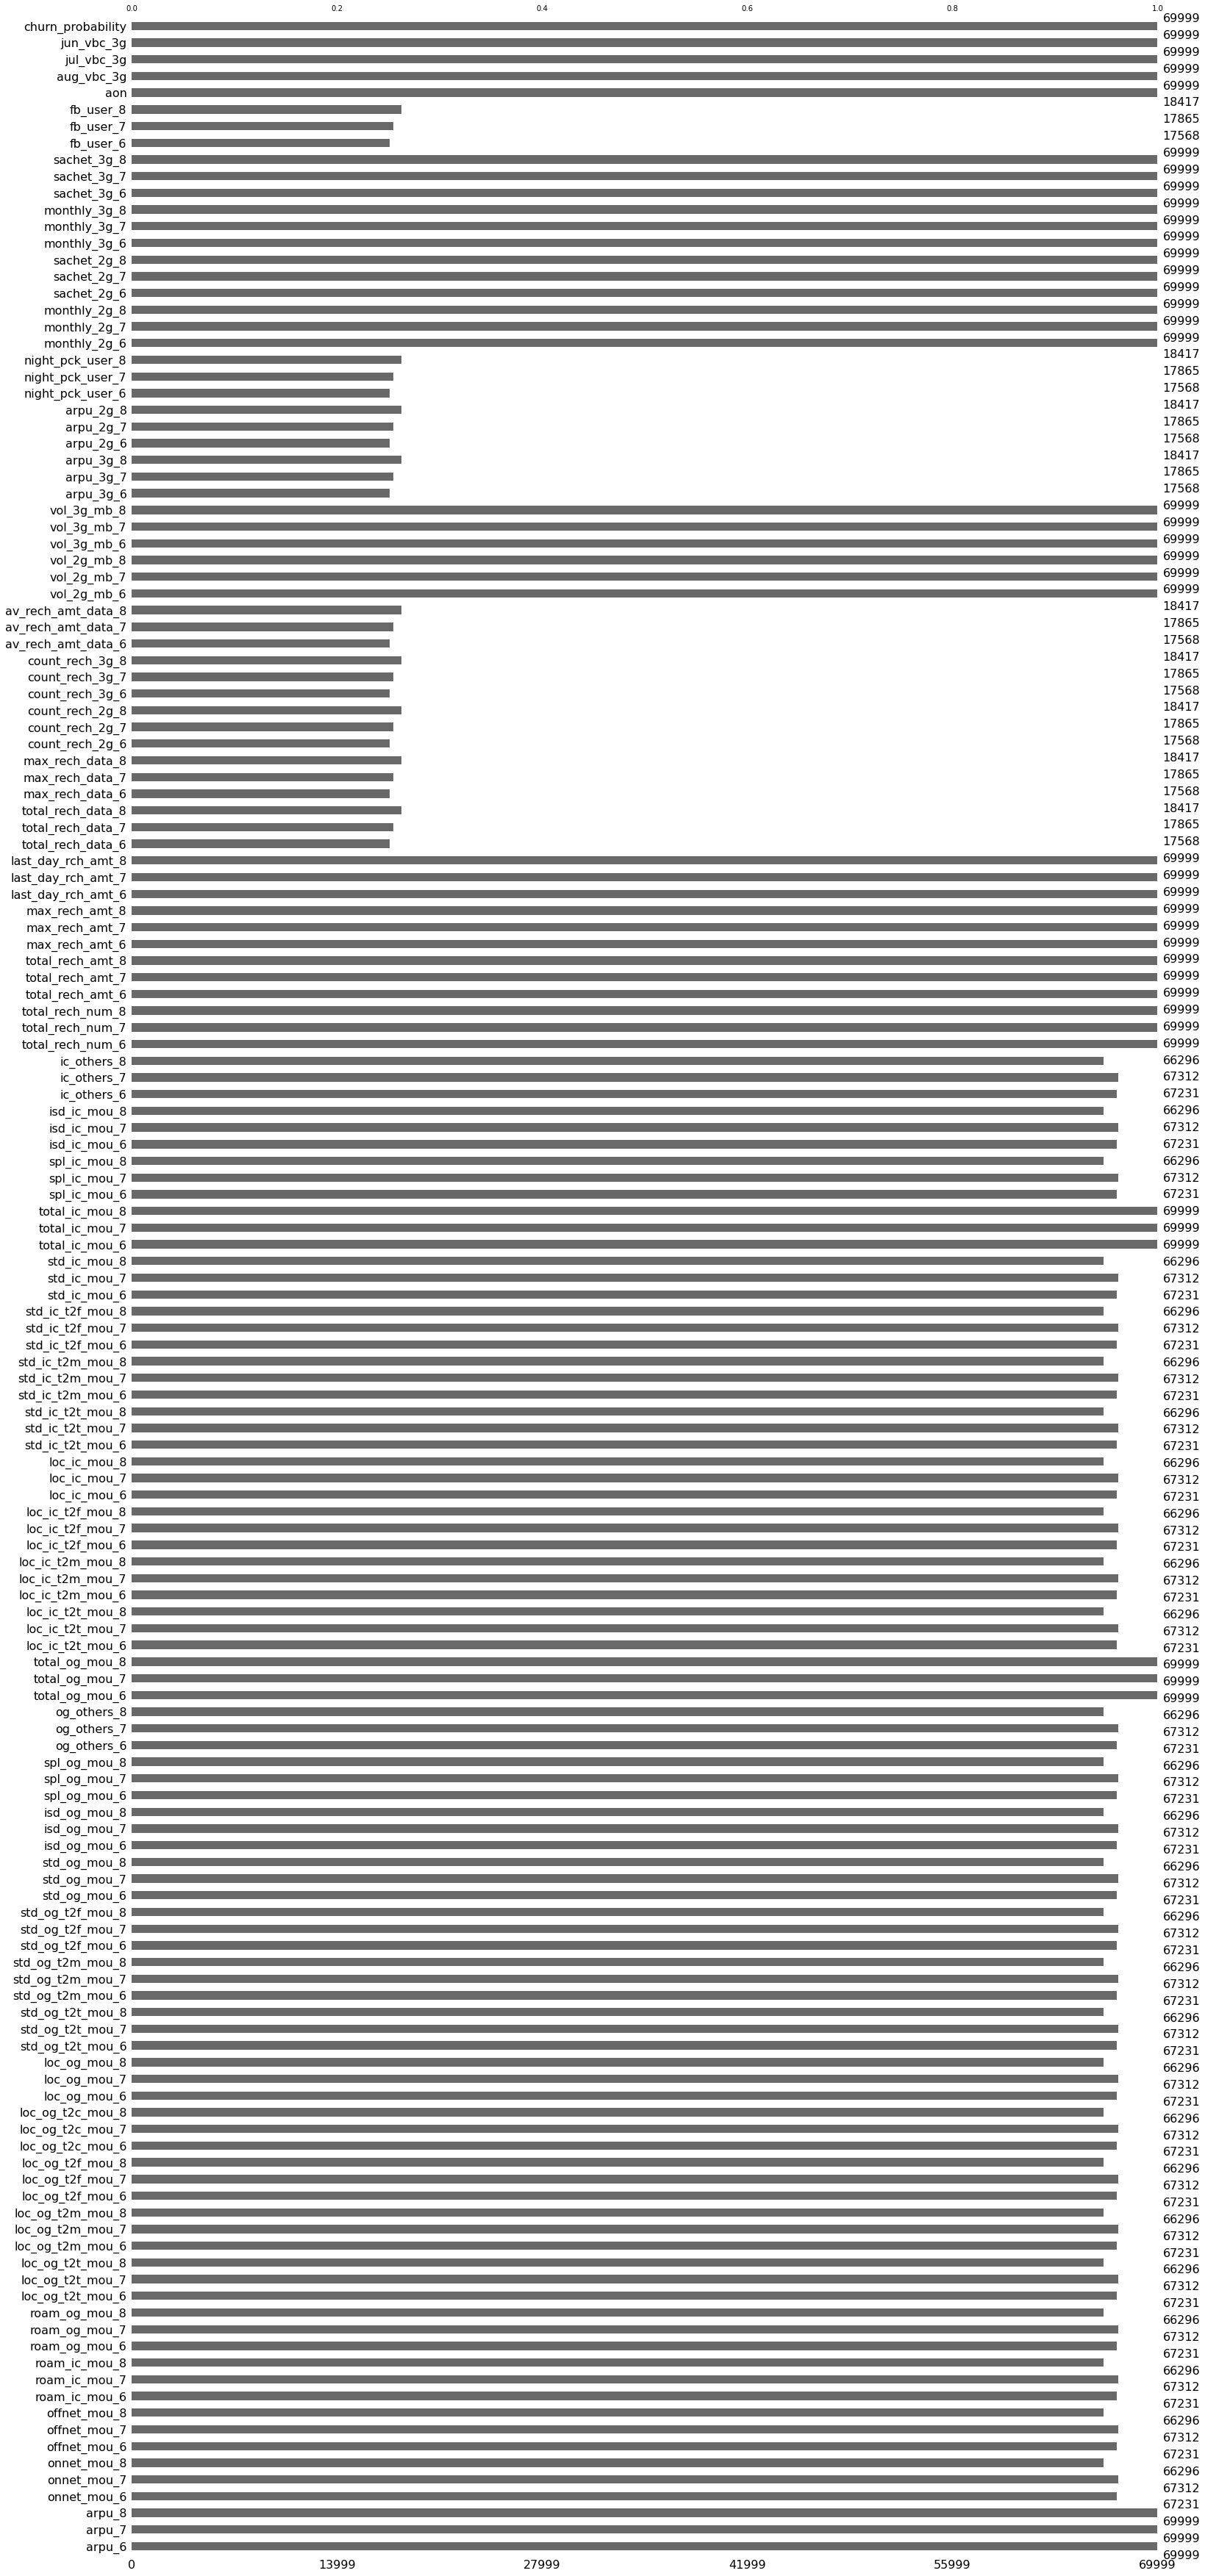

In [169]:
# Checking the missing values...
msno.bar(data)

In [170]:
# getting missing %
round(data.isnull().mean()*100,2)

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            3.95
onnet_mou_7            3.84
onnet_mou_8            5.29
offnet_mou_6           3.95
offnet_mou_7           3.84
offnet_mou_8           5.29
roam_ic_mou_6          3.95
roam_ic_mou_7          3.84
roam_ic_mou_8          5.29
roam_og_mou_6          3.95
roam_og_mou_7          3.84
roam_og_mou_8          5.29
loc_og_t2t_mou_6       3.95
loc_og_t2t_mou_7       3.84
loc_og_t2t_mou_8       5.29
loc_og_t2m_mou_6       3.95
loc_og_t2m_mou_7       3.84
loc_og_t2m_mou_8       5.29
loc_og_t2f_mou_6       3.95
loc_og_t2f_mou_7       3.84
loc_og_t2f_mou_8       5.29
loc_og_t2c_mou_6       3.95
loc_og_t2c_mou_7       3.84
loc_og_t2c_mou_8       5.29
loc_og_mou_6           3.95
loc_og_mou_7           3.84
loc_og_mou_8           5.29
std_og_t2t_mou_6       3.95
std_og_t2t_mou_7       3.84
std_og_t2t_mou_8       5.29
std_og_t2m_mou_6       3.95
std_og_t2m_mou_7       3.84
std_og_t2m_mou_8    

As we can see there are plenty of missing values that exceeds 50% ( even over 70%)...

In [171]:
# Getting rid of the columns with missing values over 50%...
data = data.loc[:,data.isnull().mean()<=0.5]

In [172]:
# Checking the missing values again...
round(data.isnull().mean()*100,2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           3.95
onnet_mou_7           3.84
onnet_mou_8           5.29
offnet_mou_6          3.95
offnet_mou_7          3.84
offnet_mou_8          5.29
roam_ic_mou_6         3.95
roam_ic_mou_7         3.84
roam_ic_mou_8         5.29
roam_og_mou_6         3.95
roam_og_mou_7         3.84
roam_og_mou_8         5.29
loc_og_t2t_mou_6      3.95
loc_og_t2t_mou_7      3.84
loc_og_t2t_mou_8      5.29
loc_og_t2m_mou_6      3.95
loc_og_t2m_mou_7      3.84
loc_og_t2m_mou_8      5.29
loc_og_t2f_mou_6      3.95
loc_og_t2f_mou_7      3.84
loc_og_t2f_mou_8      5.29
loc_og_t2c_mou_6      3.95
loc_og_t2c_mou_7      3.84
loc_og_t2c_mou_8      5.29
loc_og_mou_6          3.95
loc_og_mou_7          3.84
loc_og_mou_8          5.29
std_og_t2t_mou_6      3.95
std_og_t2t_mou_7      3.84
std_og_t2t_mou_8      5.29
std_og_t2m_mou_6      3.95
std_og_t2m_mou_7      3.84
std_og_t2m_mou_8      5.29
std_og_t2f_mou_6      3.95
s

<AxesSubplot:>

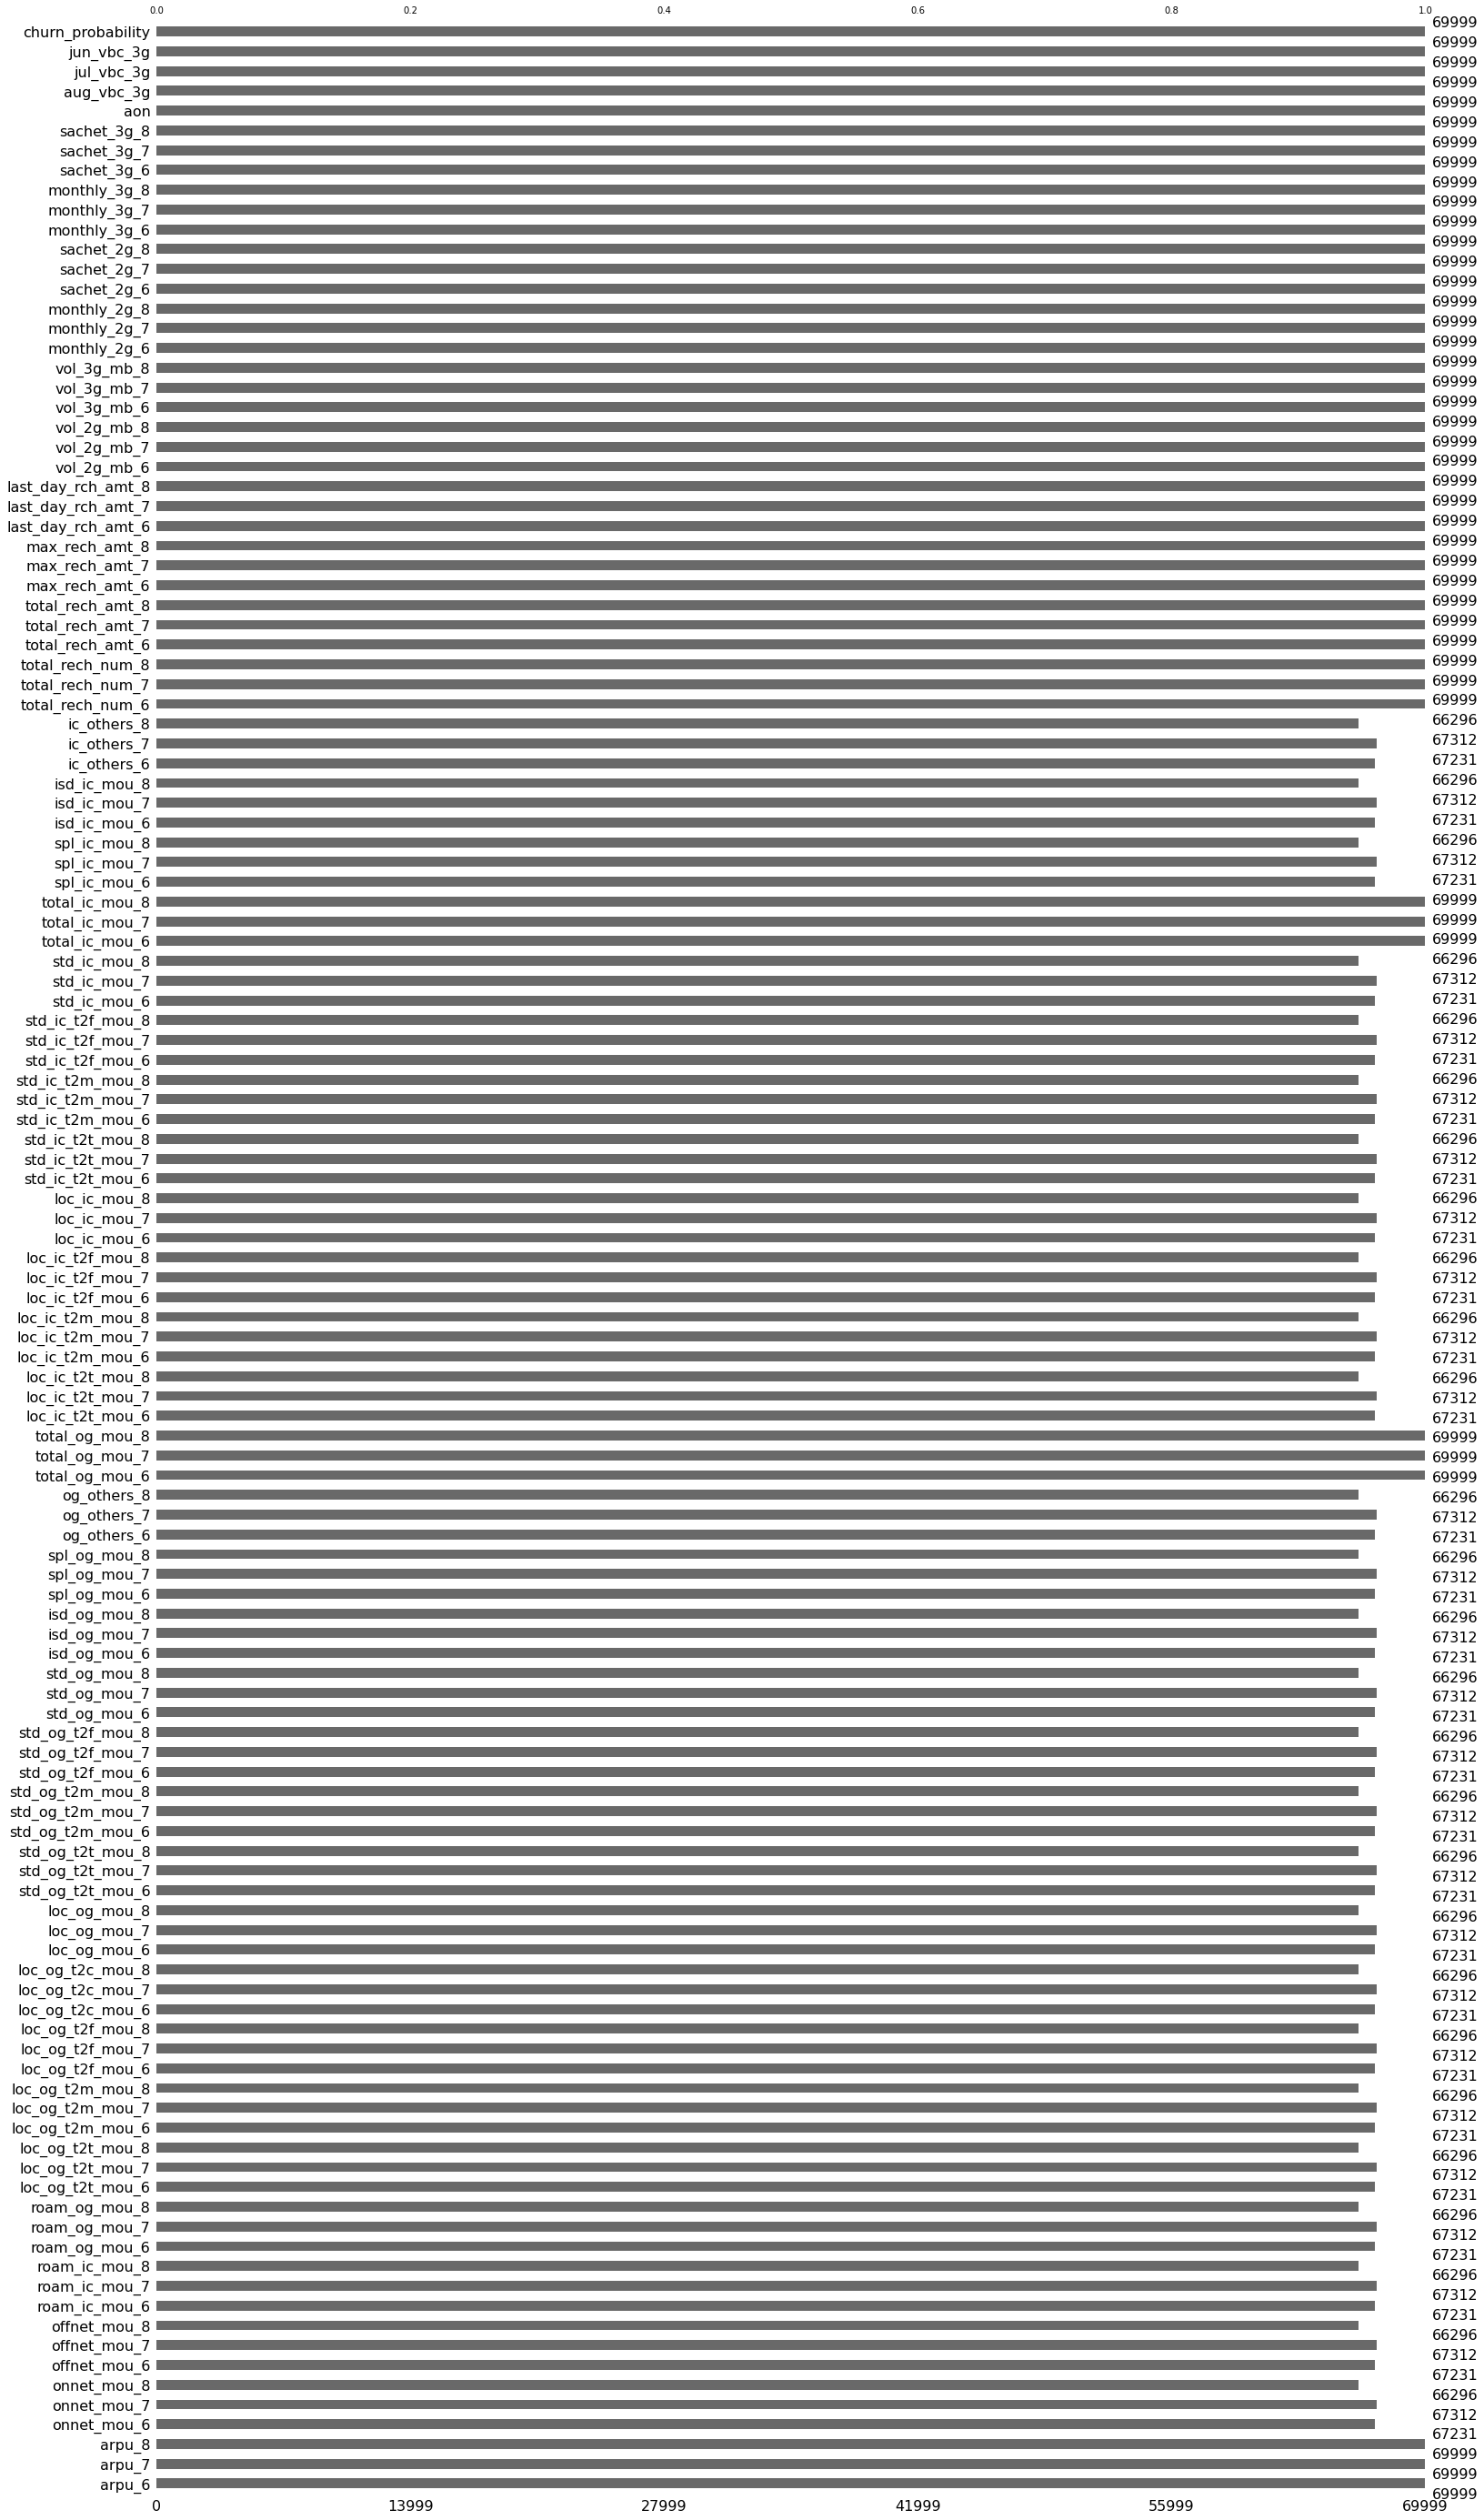

In [173]:
msno.bar(data)

All the missing values are between 3% to 5% so we can just interpolate the missing values as it won't effect our analysis and keep the purity of the data intact.

In [174]:
# column with missing values
col=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']

In [175]:
# interpolating all the missing value columns
for i in col:
    data[i]=data[i].interpolate(method='polynomial', order=2)

<AxesSubplot:>

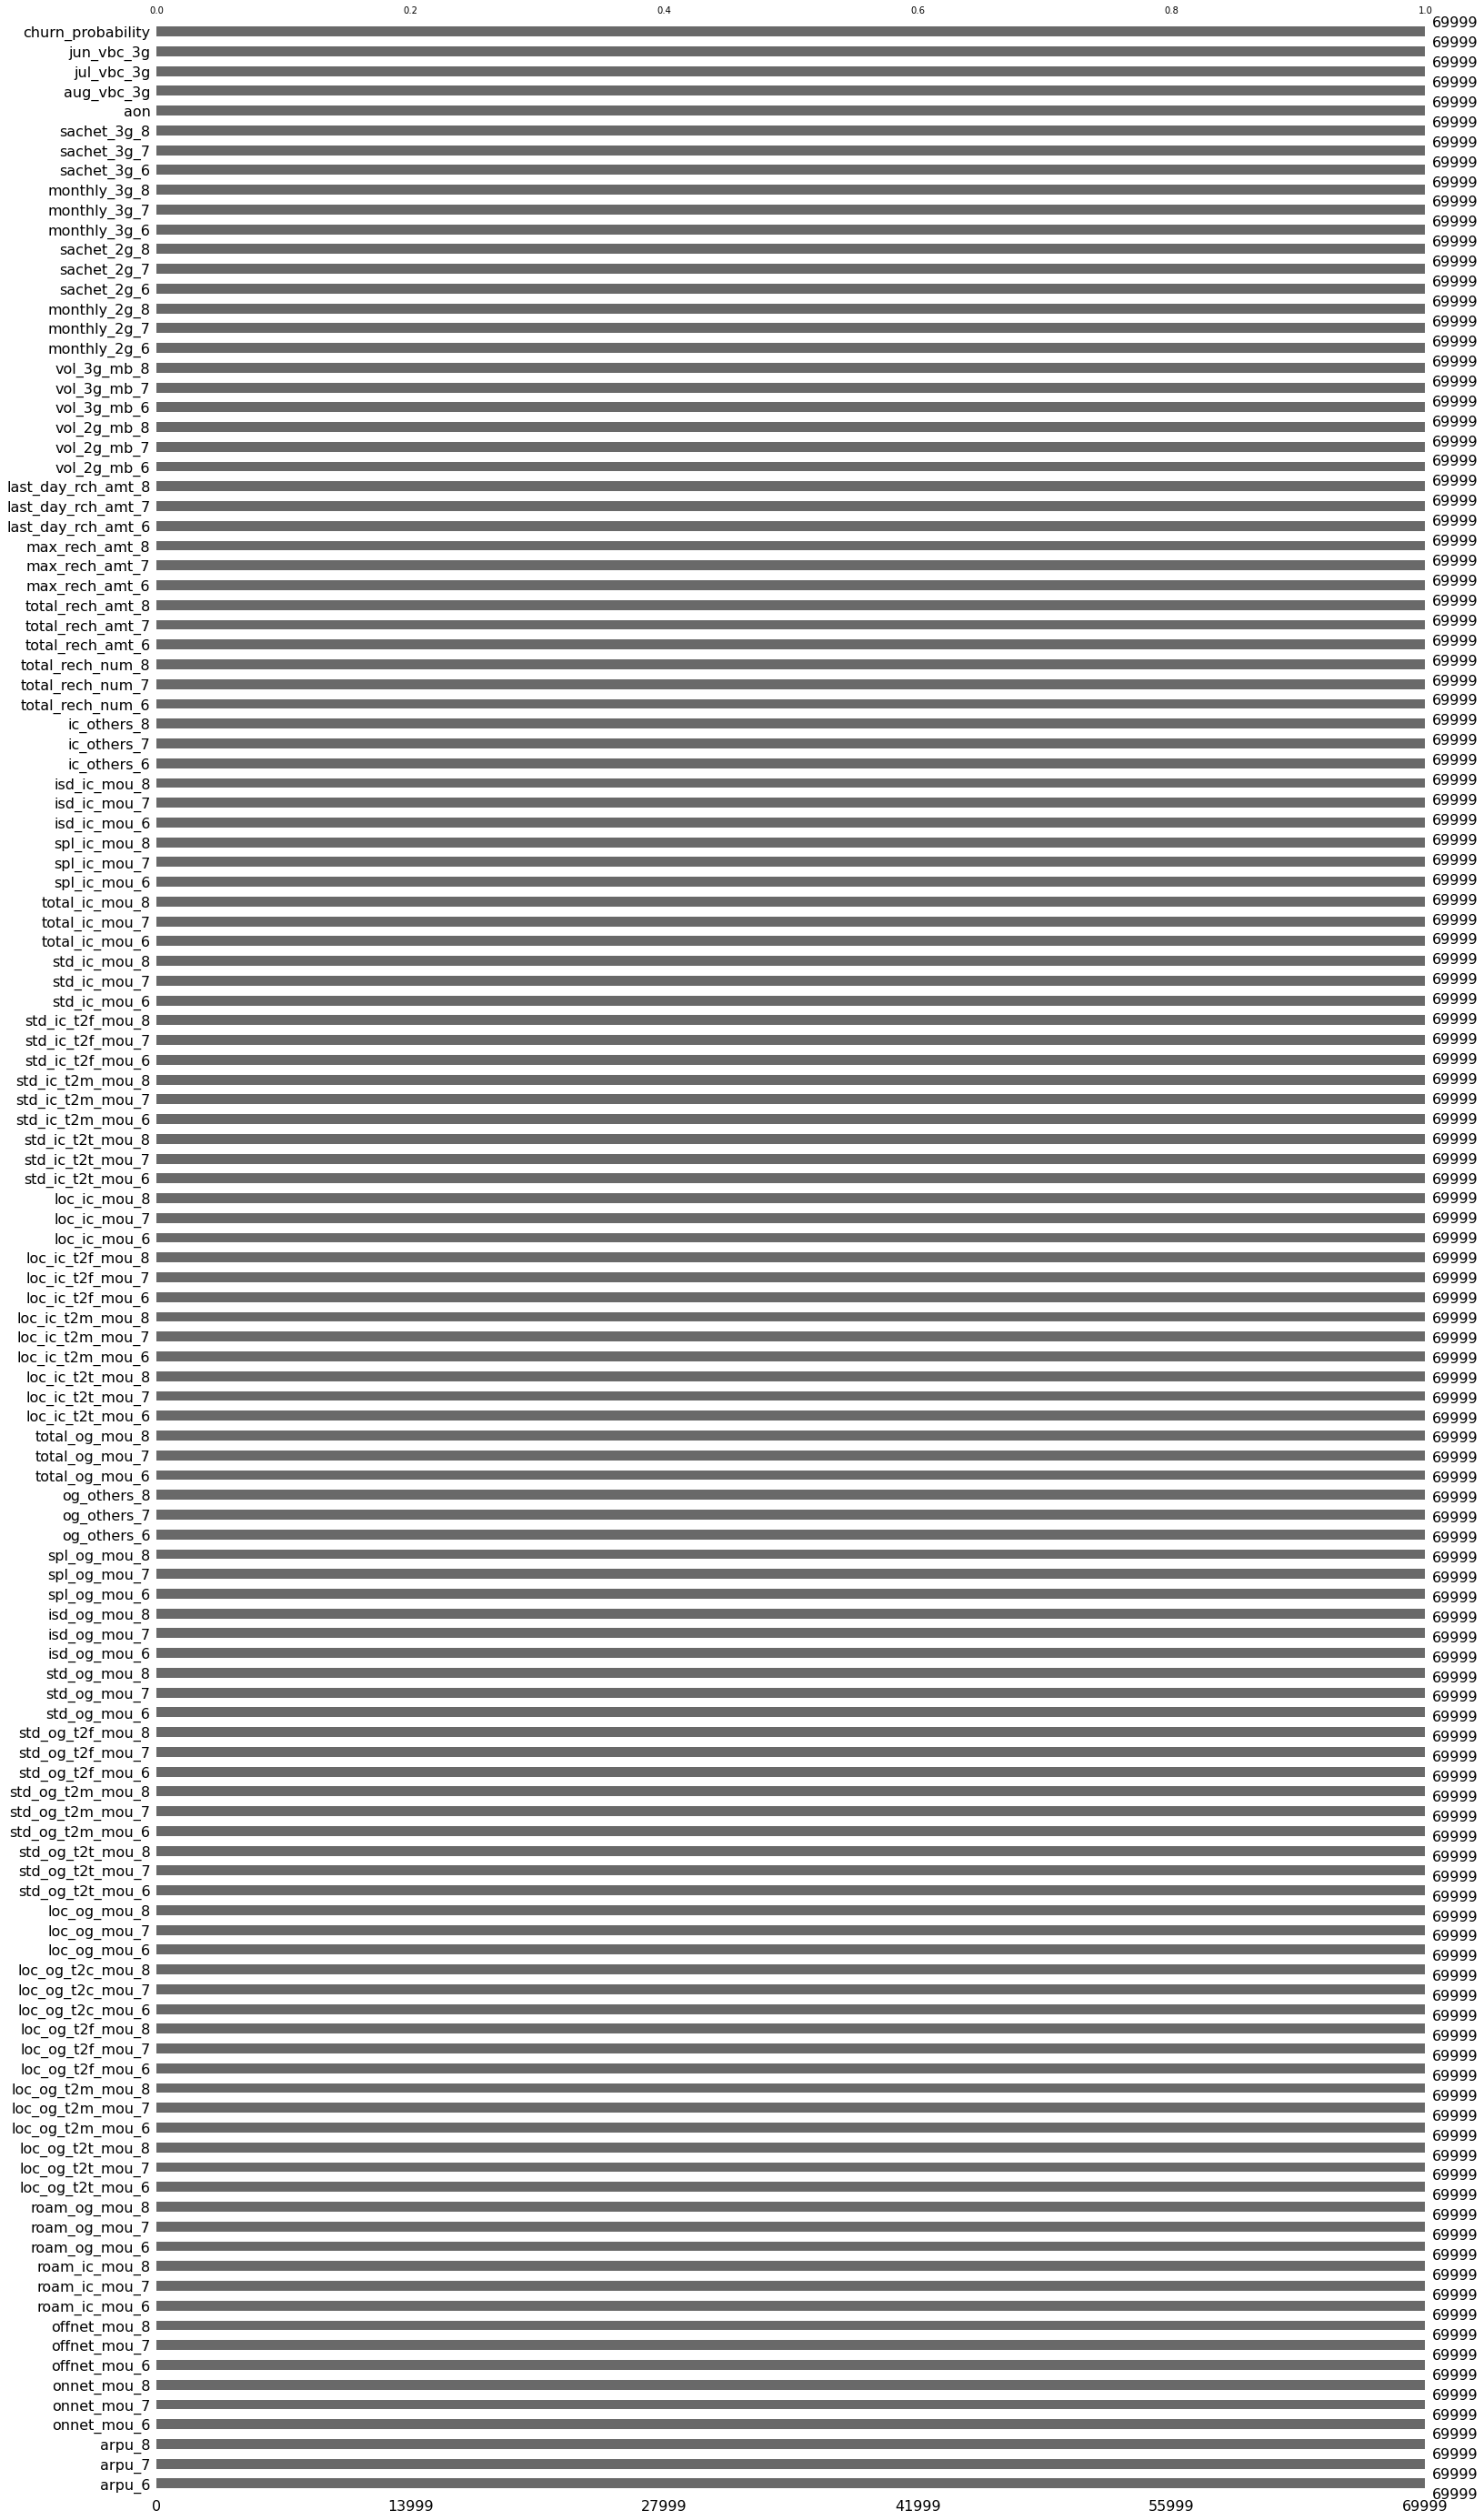

In [176]:
msno.bar(data)

In [177]:
# Checking the shape...
data.shape

(69999, 125)

# Outlier handling

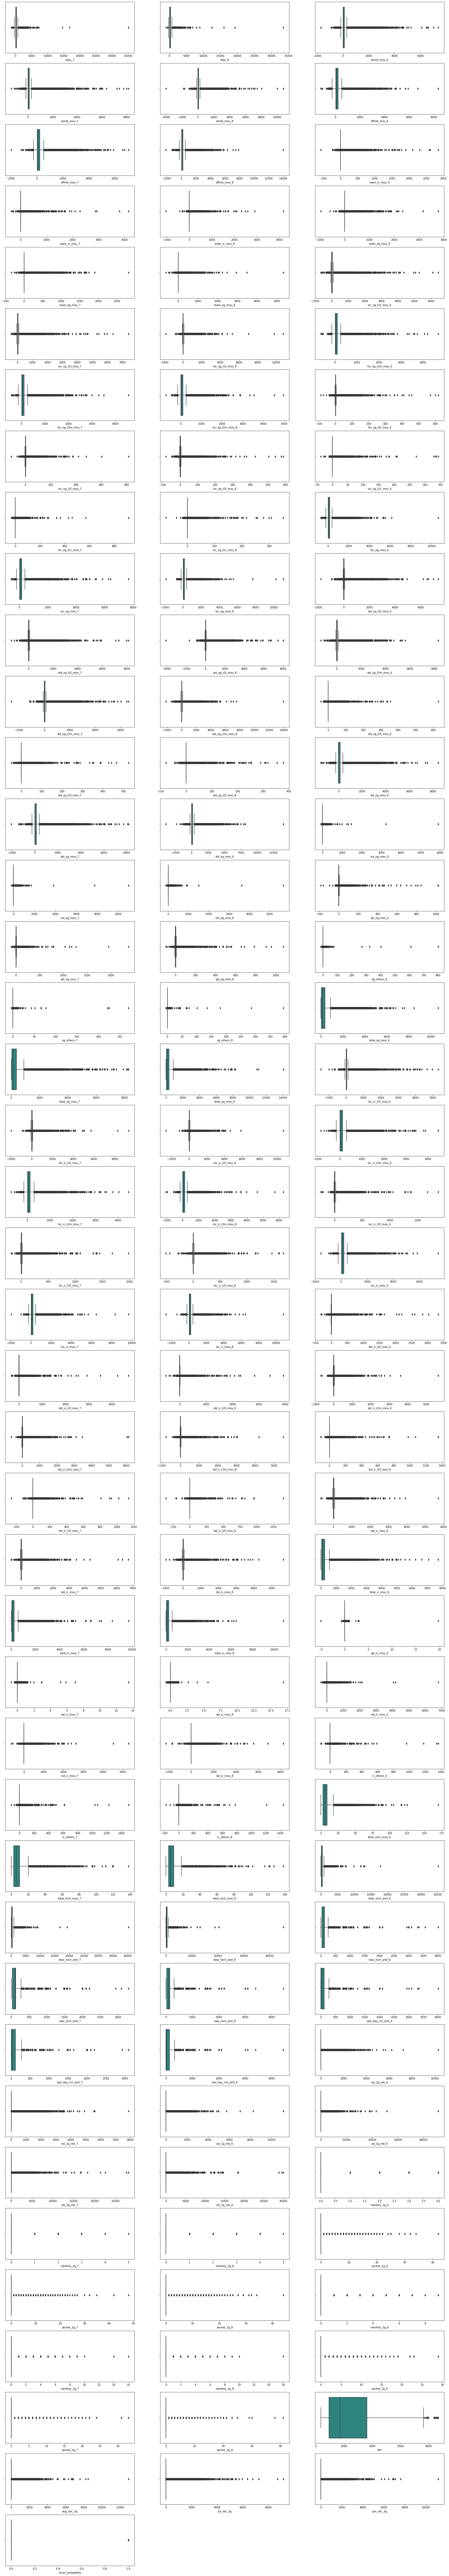

In [178]:
# Making box plot for the data
plt.figure(figsize = (30,180))
feature = data.columns[1:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(data[i[1]],palette='viridis')

In [179]:
# columns for outlier handling
upper_cap_cols=['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [180]:
# Capping the data
for col in upper_cap_cols:
    upper_limit = data[col].mean() + (3*data[col].std())
    lower_limit = data[col].mean() - (3*data[col].std())
    # capping upper bound 
    data[col][data[col]<lower_limit] = lower_limit
    # capping Lower bound
    data[col][data[col]>upper_limit] = upper_limit

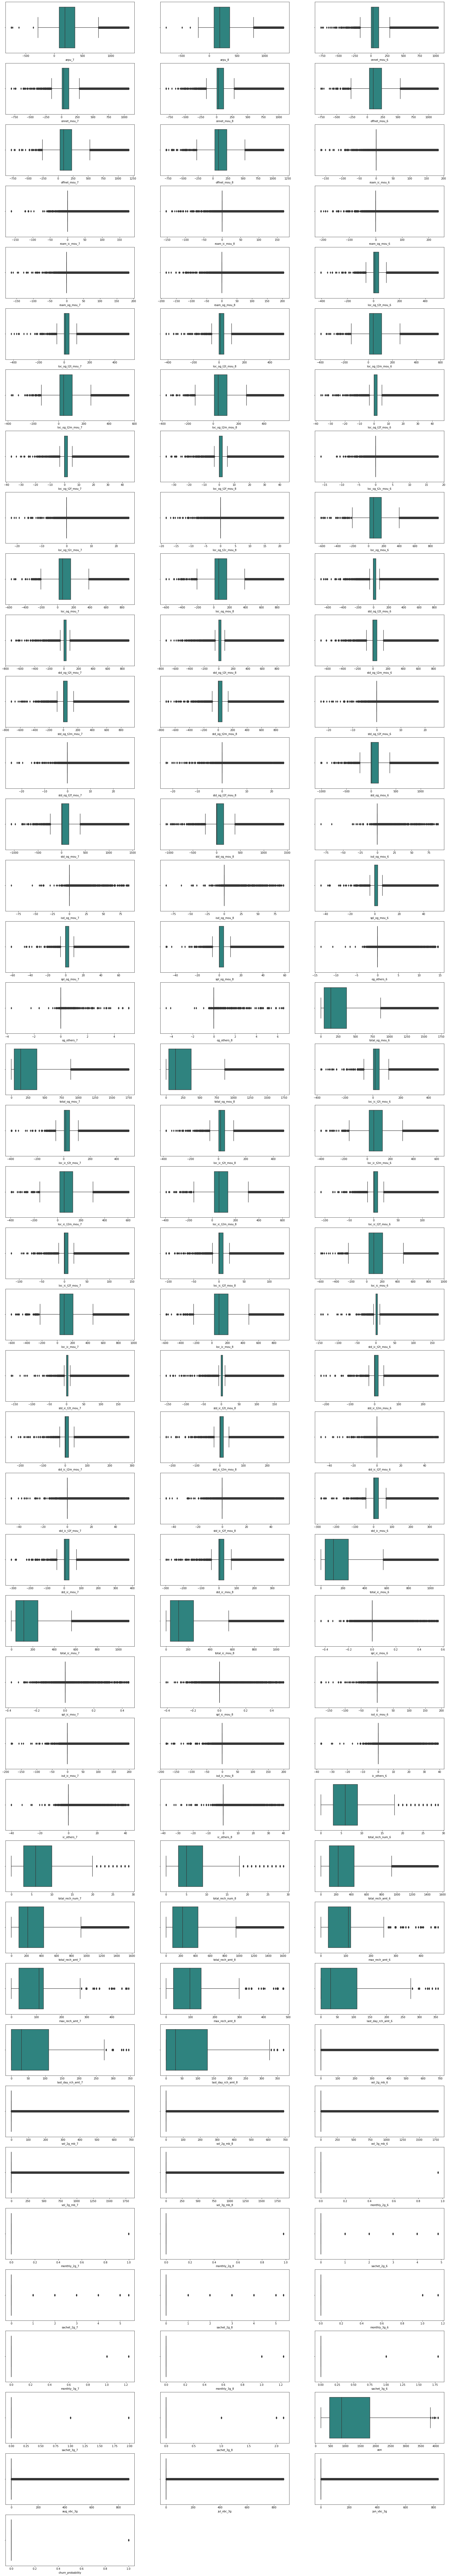

In [181]:
# plotting the data again to check if outliers are handled
plt.figure(figsize = (30,180))
feature = data.columns[1:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(data[i[1]],palette='viridis')

So from the above plot we can see that outliers are handled and our data looks continuous now.

# EDA

In [182]:
# making a copy of the data frame as it can be useful later
data1=data.copy()

As we have three columns of each type which represent differnt months let's take there average and make them as single column to reduce number of columns and multicollinearity.

In [183]:
# Making modified columns
data['arpu_Avg']=(data['arpu_6']+data['arpu_7']+data['arpu_8'])/3
data['onnet_mou_Avg']=(data['onnet_mou_6']+data['onnet_mou_7']+data['onnet_mou_8'])/3
data['offnet_mou_Avg']=(data['offnet_mou_6']+data['offnet_mou_7']+data['offnet_mou_8'])/3
data['roam_ic_mou_Avg']=(data['roam_ic_mou_6']+data['roam_ic_mou_7']+data['roam_ic_mou_8'])/3
data['roam_og_mou_Avg']=(data['roam_og_mou_6']+data['roam_og_mou_7']+data['roam_og_mou_8'])/3
data['loc_og_t2t_mou_Avg']=(data['loc_og_t2t_mou_6']+data['loc_og_t2t_mou_7']+data['loc_og_t2t_mou_8'])/3
data['loc_og_t2m_mou_Avg']=(data['loc_og_t2m_mou_6']+data['loc_og_t2m_mou_7']+data['loc_og_t2m_mou_8'])/3
data['loc_og_t2f_mou_Avg']=(data['loc_og_t2f_mou_6']+data['loc_og_t2f_mou_7']+data['loc_og_t2f_mou_8'])/3
data['loc_og_t2c_mou_Avg']=(data['loc_og_t2c_mou_6']+data['loc_og_t2c_mou_7']+data['loc_og_t2c_mou_8'])/3
data['loc_og_mou_Avg']=(data['loc_og_mou_6']+data['loc_og_mou_7']+data['loc_og_mou_8'])/3
data['std_og_t2t_mou_Avg']=(data['std_og_t2t_mou_6']+data['std_og_t2t_mou_7']+data['std_og_t2t_mou_8'])/3
data['std_og_t2m_mou_Avg']=(data['std_og_t2m_mou_6']+data['std_og_t2m_mou_7']+data['std_og_t2m_mou_8'])/3
data['std_og_t2f_mou_Avg']=(data['std_og_t2f_mou_6']+data['std_og_t2f_mou_7']+data['std_og_t2f_mou_8'])/3
data['std_og_mou_Avg']=(data['std_og_mou_6']+data['std_og_mou_7']+data['std_og_mou_8'])/3
data['isd_og_mou_Avg']=(data['isd_og_mou_6']+data['isd_og_mou_7']+data['isd_og_mou_8'])/3
data['spl_og_mou_Avg']=(data['spl_og_mou_6']+data['spl_og_mou_7']+data['spl_og_mou_8'])/3
data['og_others_Avg']=(data['og_others_6']+data['og_others_7']+data['og_others_8'])/3
data['total_og_mou_Avg']=(data['total_og_mou_6']+data['total_og_mou_7']+data['total_og_mou_8'])/3
data['loc_ic_t2t_mou_Avg']=(data['loc_ic_t2t_mou_6']+data['loc_ic_t2t_mou_7']+data['loc_ic_t2t_mou_8'])/3
data['loc_ic_t2m_mou_Avg']=(data['loc_ic_t2m_mou_6']+data['loc_ic_t2m_mou_7']+data['loc_ic_t2m_mou_8'])/3
data['loc_ic_t2f_mou_Avg']=(data['loc_ic_t2f_mou_6']+data['loc_ic_t2f_mou_7']+data['loc_ic_t2f_mou_8'])/3
data['loc_ic_mou_Avg']=(data['loc_ic_mou_6']+data['loc_ic_mou_7']+data['loc_ic_mou_8'])/3
data['std_ic_t2t_mou_Avg']=(data['std_ic_t2t_mou_6']+data['std_ic_t2t_mou_7']+data['std_ic_t2t_mou_8'])/3
data['std_ic_t2m_mou_Avg']=(data['std_ic_t2m_mou_6']+data['std_ic_t2m_mou_7']+data['std_ic_t2m_mou_8'])/3
data['std_ic_t2f_mou_Avg']=(data['std_ic_t2f_mou_6']+data['std_ic_t2f_mou_7']+data['std_ic_t2f_mou_8'])/3
data['std_ic_mou_Avg']=(data['std_ic_mou_6']+data['std_ic_mou_7']+data['std_ic_mou_8'])/3
data['total_ic_mou_Avg']=(data['total_ic_mou_6']+data['total_ic_mou_7']+data['total_ic_mou_8'])/3
data['spl_ic_mou_Avg']=(data['spl_ic_mou_6']+data['spl_ic_mou_7']+data['spl_ic_mou_8'])/3
data['isd_ic_mou_Avg']=(data['isd_ic_mou_6']+data['isd_ic_mou_7']+data['isd_ic_mou_8'])/3
data['ic_others_Avg']=(data['ic_others_6']+data['ic_others_7']+data['ic_others_8'])/3
data['total_rech_num_Avg']=(data['total_rech_num_6']+data['total_rech_num_7']+data['total_rech_num_8'])/3
data['total_rech_amt_Avg']=(data['total_rech_amt_6']+data['total_rech_amt_7']+data['total_rech_amt_8'])/3
data['max_rech_amt_Avg']=(data['max_rech_amt_6']+data['max_rech_amt_7']+data['max_rech_amt_8'])/3
data['last_day_rch_amt_Avg']=(data['last_day_rch_amt_6']+data['last_day_rch_amt_7']+data['last_day_rch_amt_8'])/3
data['vol_2g_mb_Avg']=(data['vol_2g_mb_6']+data['vol_2g_mb_7']+data['vol_2g_mb_8'])/3
data['vol_3g_mb_Avg']=(data['vol_3g_mb_6']+data['vol_3g_mb_7']+data['vol_3g_mb_8'])/3
data['monthly_2g_Avg']=(data['monthly_2g_6']+data['monthly_2g_7']+data['monthly_2g_8'])/3
data['sachet_2g_Avg']=(data['sachet_2g_6']+data['sachet_2g_7']+data['sachet_2g_8'])/3
data['monthly_3g_Avg']=(data['monthly_3g_6']+data['monthly_3g_7']+data['monthly_3g_8'])/3
data['sachet_3g_Avg']=(data['sachet_3g_6']+data['sachet_3g_7']+data['sachet_3g_8'])/3
data['Avg_vbc_3g']=(data['aug_vbc_3g']+data['jul_vbc_3g']+data['jun_vbc_3g'])/3


In [184]:
# droping all the old columns
data.drop([ 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8',  'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'
       ],1,inplace=True)

In [185]:
data.shape

(69999, 43)

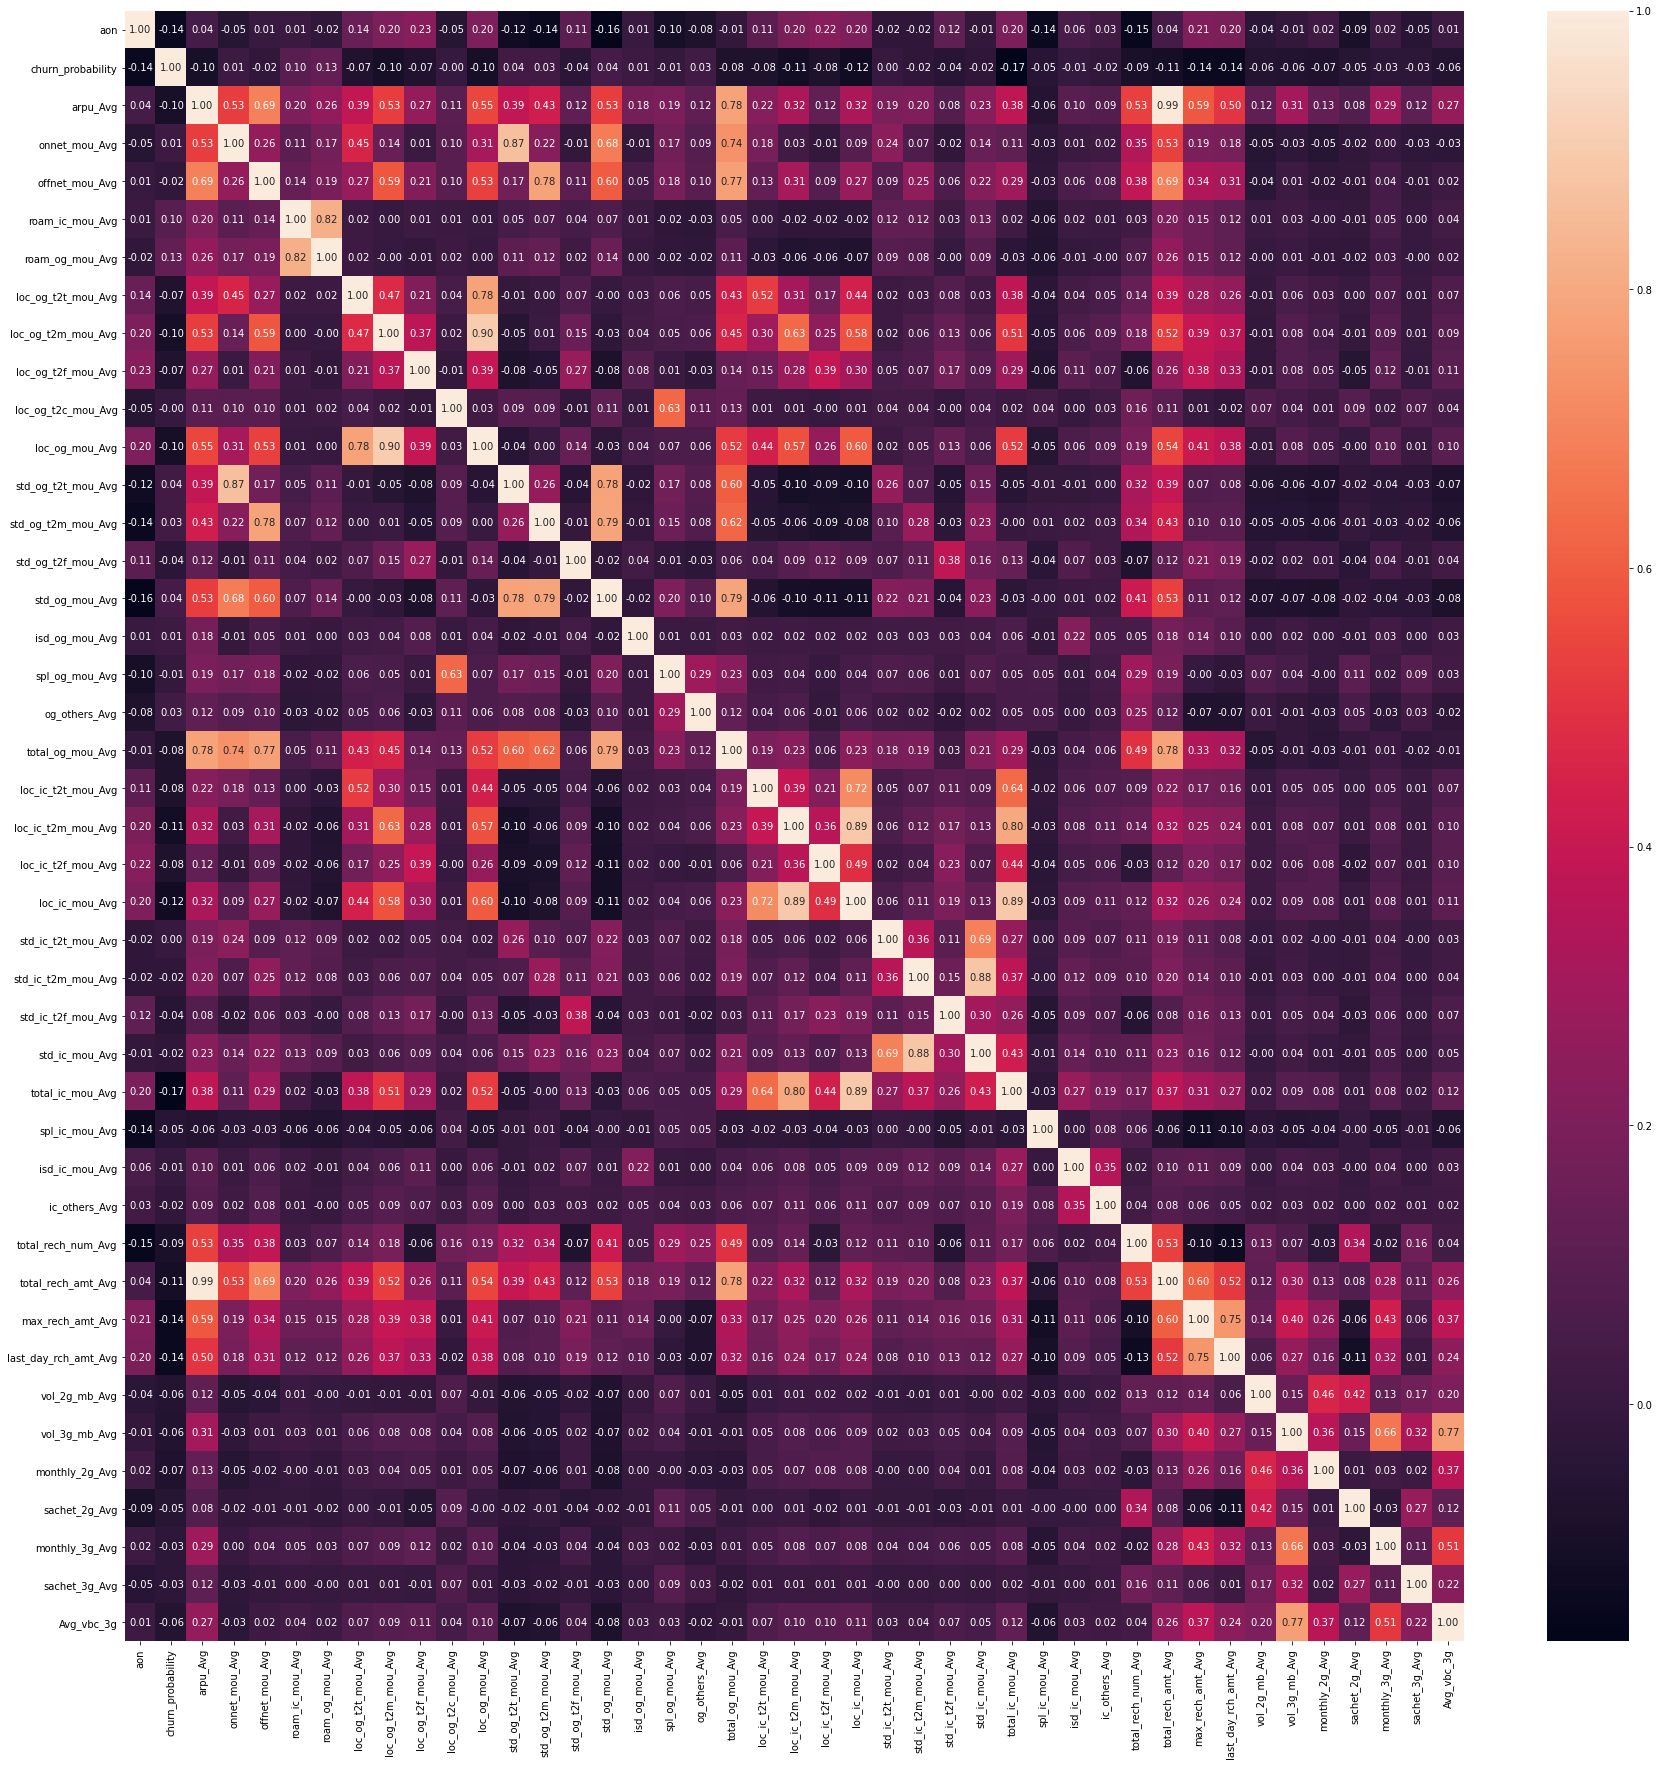

In [186]:
# let's plot heat map of data frame
plt.figure(figsize=[30,30])
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

#### Inference:

These columns have high correlation :

1. arpu_avg and total_rech_amt_avg
2. total_ic_mou_avg and loc_ic_mou_avg
3. std_ic_mou_avg and std_ic_t2m_mou_avg
4. loc_ic_mou_avg and loc_ic_t2m_mou_avg
5. roam_og_mou_avg and roam_ic_mou_avg
6. loc_og_mou_avg and loc_og_t2m_mou_avg

We won't drop these columns as we don't want to lose information, we will take care of multicollinearity in later steps

Let's analyze the column which are highly correlated with churn probablity

In [187]:
# function for numerical bivariate analysis
def uni_numerical(df0,z):
    plt.figure(figsize=[15,6])
    plt.title('Density plot of {} column'.format(z))
    plt.ylabel('Density')
    df1=df0[df0['churn_probability']==0]
    df2=df0[df0['churn_probability']==1]
    sns.distplot(df1[z],hist=False,label='Not-Churned')
    sns.distplot(df2[z],hist=False,label='Churned')
    plt.show()
    print('\n\n')
    print('Median of {} column for Not-Churned case is {}'.format(z,df1[z].median()))
    print('Median of {} column for Churned case is {}'.format(z,df2[z].median()))

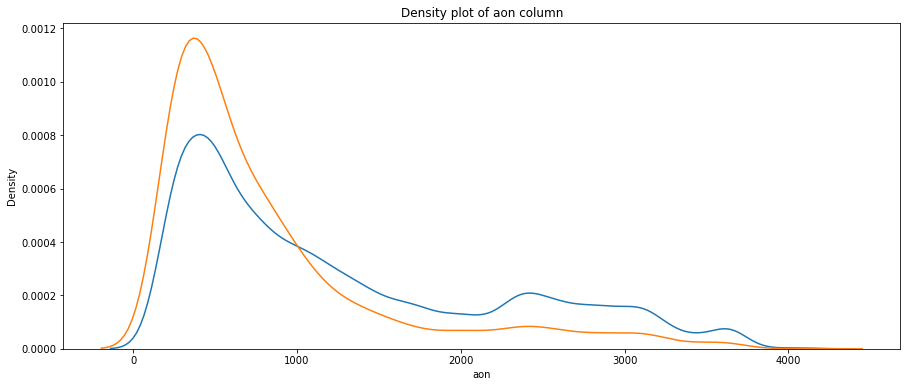




Median of aon column for Not-Churned case is 925.0
Median of aon column for Churned case is 570.5


In [188]:
# bivariate analysis of aon column
uni_numerical(data,'aon')

#### Inference :
    
As the area of network increases the churn case decreases.

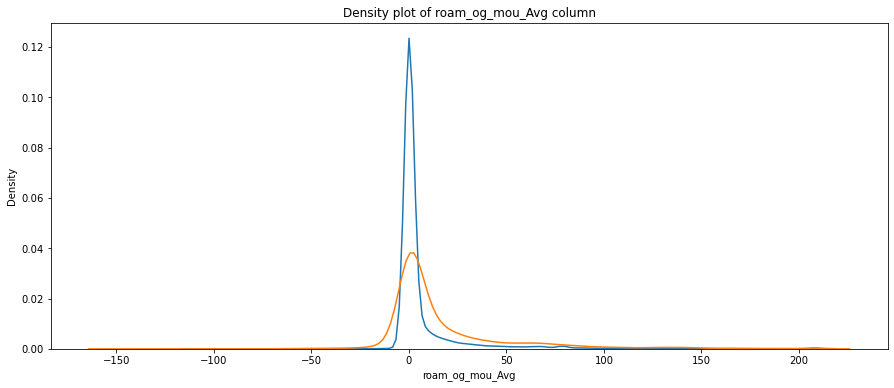




Median of roam_og_mou_Avg column for Not-Churned case is 0.0
Median of roam_og_mou_Avg column for Churned case is 3.1596827951749127


In [189]:
# bivariate analysis of roam_og_mou_Avg column
uni_numerical(data,'roam_og_mou_Avg')

#### Inference:
We can say that churn cases are high if user is doing outgoing call in roaming.

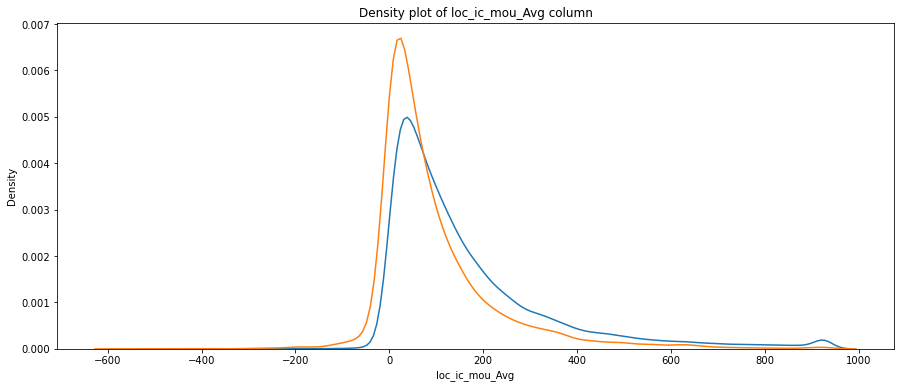




Median of loc_ic_mou_Avg column for Not-Churned case is 105.43666666666667
Median of loc_ic_mou_Avg column for Churned case is 54.824714305204736


In [190]:
# bivariate analysis of loc_ic_mou_Avg column
uni_numerical(data,'loc_ic_mou_Avg')

#### Inference:
We can see similar trend here that non churning user are using this network more for local incoming and outgoing calls.

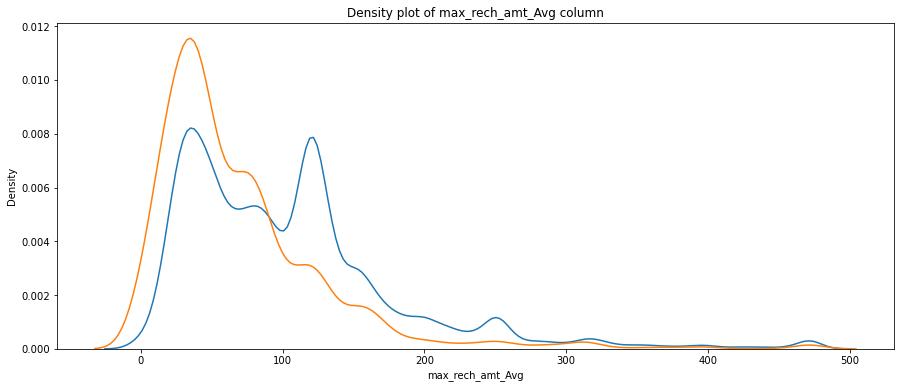




Median of max_rech_amt_Avg column for Not-Churned case is 90.0
Median of max_rech_amt_Avg column for Churned case is 50.0


In [191]:
# bivariate analysis of max_rech_amt_Avg column
uni_numerical(data,'max_rech_amt_Avg')

#### Inference:
We can say that non churning customers have higher max recharge amounts.

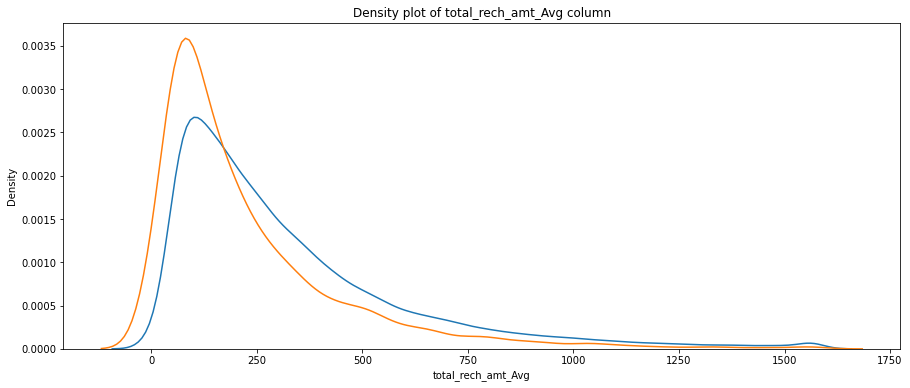




Median of total_rech_amt_Avg column for Not-Churned case is 240.0
Median of total_rech_amt_Avg column for Churned case is 152.0


In [192]:
# bivariate analysis of total_rech_amt_Avg column
uni_numerical(data,'total_rech_amt_Avg')

#### Inference:
We can see that non churn customers have done more amount of total recharge.

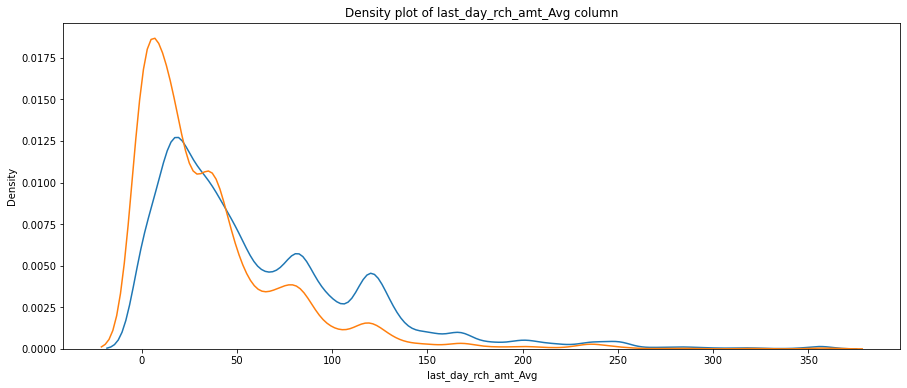




Median of last_day_rch_amt_Avg column for Not-Churned case is 43.333333333333336
Median of last_day_rch_amt_Avg column for Churned case is 21.333333333333332


In [193]:
# bivariate analysis of last_day_rch_amt_Avg column
uni_numerical(data,'last_day_rch_amt_Avg')

#### Inference :
Non churn case have high last day recharge amount.

# Train Test Split

In [194]:
# Independent and dependent variable
X=data.drop('churn_probability',1)
y=data.churn_probability

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52499, 42), (17500, 42), (52499,), (17500,))

# Build Models Using Pipeline

### Logistic Regression model with PCA

In [197]:
from sklearn.pipeline import Pipeline

In [100]:
# Define the logistic model
lr = LogisticRegression(n_jobs=-1,random_state=0)
scaler = StandardScaler()
pca = PCA(0.90)

pipe_lr = Pipeline(steps=[('scaler',scaler),
                          ('pca',pca),
                          ('model',lr)])

params = [{"model__max_iter": [200,500],
           "model__C": np.logspace(0, 4, 10)}]

search = GridSearchCV(pipe_lr,params,n_jobs=-1,cv=5,verbose=True)

best_model = search.fit(X_train,y_train)

print("Best parameter (CV score=%0.3f):" % best_model.best_score_)
print(best_model.best_params_)
print(best_model.score(X_test,y_test))
print(best_model.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter (CV score=0.899):
{'model__C': 1.0, 'model__max_iter': 200}
0.8951428571428571
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('model',
                 LogisticRegression(max_iter=200, n_jobs=-1, random_state=0))])


In [101]:
best_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.9)),
                ('model',
                 LogisticRegression(max_iter=200, n_jobs=-1, random_state=0))])

In [104]:
confusion_matrix(y_train, best_model.best_estimator_.predict(X_train))

array([[47069,   118],
       [ 5181,   131]], dtype=int64)

In [105]:
confusion_matrix(y_test, best_model.best_estimator_.predict(X_test))

array([[15630,    50],
       [ 1785,    35]], dtype=int64)

In [108]:
precision_score(y_test, best_model.best_estimator_.predict(X_test))

0.4117647058823529

In [109]:
recall_score(y_test, best_model.best_estimator_.predict(X_test))

0.019230769230769232

In [110]:
roc_auc_score(y_test, best_model.best_estimator_.predict(X_test))

0.5080209968602825

### RandomForest Classifier Model

#### Please do not run the below codes again as they take very long.

In [111]:
# Define basic random forest model
rf = RandomForestClassifier(random_state=0,n_jobs=-1,verbose=1)

# Setting hyperparameters
params_rf = {'max_depth': [5,10,25],
             'max_features': [10,15,25],
             'n_estimators': [200,300]}

# model building with 4-fold cv
model_cv = GridSearchCV(estimator=rf, 
                        param_grid=params_rf,
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True,
                        cv=4)

# Fitting the model with hyperparams and cv
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25], 'max_features': [10, 15, 25],
                         'n_estimators': [200, 300]},
             return_train_score=True, verbose=1)

In [112]:
#best score from models
model_cv.best_score_

0.9226842266440255

In [125]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=25, max_features=25, n_estimators=200,
                       n_jobs=-1, random_state=0, verbose=1)

#### We concluded that the best estimators are (max_depth=25, max_features=25, n_estimators=200, n_jobs=-1, random_state=0, verbose=1)

In [198]:
# Build dataframe to see average test and train data to decide hyperparameters of final model
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth param_max_features param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  mean_train_score  std_train_score
16     374.518352      3.689994         3.224724        0.309195              25                 25                200  {'max_depth': 25, 'max_features': 25, 'n_estim...           0.921524           0.924190           0.923124           0.921899         0.922684        0.001052                1            0.993752            0.993549            0.992965            0.994895          0.993790         0.000700
17     556.496613      3.999490         2.196541        1.337151              25                 25                300  {'max_depth': 25, 'max_features': 25, 'n_estim...           0.921676           0.923886           0.923352           0.921213         0.922532        0.001116                2            0.993778            0.993422            0.992889            0.995124          0.993803         0.000826
15     337.935042      3.529436         3.846691        0.322095              25                 15                300  {'max_depth': 25, 'max_features': 15, 'n_estim...           0.921600           0.923352           0.922210           0.922280         0.922360        0.000631                3            0.993600            0.993422            0.992533            0.994108          0.993416         0.000568
12     154.783647      1.750885         3.194961        0.560515              25                 10                200  {'max_depth': 25, 'max_features': 10, 'n_estim...           0.921752           0.923505           0.921143           0.922737         0.922284        0.000906                4            0.991441            0.992482            0.992254            0.991822          0.992000         0.000400
11     286.622953      0.446091         2.767038        0.708586              10                 25                300  {'max_depth': 10, 'max_features': 25, 'n_estim...           0.921524           0.923962           0.921829           0.921518         0.922208        0.001020                5            0.946005            0.945167            0.945243            0.945016          0.945358         0.000383

In [117]:
cv_df.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth param_max_features param_n_estimators                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  mean_train_score  std_train_score
16     374.518352      3.689994         3.224724        0.309195              25                 25                200  {'max_depth': 25, 'max_features': 25, 'n_estim...           0.921524           0.924190           0.923124           0.921899         0.922684        0.001052                1            0.993752            0.993549            0.992965            0.994895          0.993790         0.000700
17     556.496613      3.999490         2.196541        1.337151              25                 25                300  {'max_depth': 25, 'max_features': 25, 'n_estim...           0.921676           0.923886           0.923352           0.921213         0.922532        0.001116                2            0.993778            0.993422            0.992889            0.995124          0.993803         0.000826
15     337.935042      3.529436         3.846691        0.322095              25                 15                300  {'max_depth': 25, 'max_features': 15, 'n_estim...           0.921600           0.923352           0.922210           0.922280         0.922360        0.000631                3            0.993600            0.993422            0.992533            0.994108          0.993416         0.000568
12     154.783647      1.750885         3.194961        0.560515              25                 10                200  {'max_depth': 25, 'max_features': 10, 'n_estim...           0.921752           0.923505           0.921143           0.922737         0.922284        0.000906                4            0.991441            0.992482            0.992254            0.991822          0.992000         0.000400
11     286.622953      0.446091         2.767038        0.708586              10                 25                300  {'max_depth': 10, 'max_features': 25, 'n_estim...           0.921524           0.923962           0.921829           0.921518         0.922208        0.001020                5            0.946005            0.945167            0.945243            0.945016          0.945358         0.000383
14     224.069933      2.582960         3.174360        0.560414              25                 15                200  {'max_depth': 25, 'max_features': 15, 'n_estim...           0.921676           0.922667           0.922210           0.922051         0.922151        0.000355                6            0.993422            0.993346            0.992508            0.993676          0.993238         0.000439
13     233.115240      2.114260         3.720324        0.605252              25                 10                300  {'max_depth': 25, 'max_features': 10, 'n_estim...           0.922133           0.922286           0.921905           0.921746         0.922018        0.000207                7            0.992025            0.992254            0.992406            0.992737          0.992355         0.000258
10     190.761280      0.662330         2.161381        0.749837              10                 25                200  {'max_depth': 10, 'max_features': 25, 'n_estim...           0.921143           0.922971           0.921295           0.922204         0.921903        0.000738                8            0.945980            0.945294            0.945192            0.944889          0.945339         0.000399
9      175.297808      0.780158         2.448830        0.770793              10                 15                300  {'max_depth': 10, 'max_features': 15, 'n_estim...           0.921067           0.922514           0.920990           0.922127         0.921675        0.000661                9          

Note: It can be observed that model #1 has better performance but it has comparatively overfitted the data, so we will choose model #5 for our final build.

In [199]:
# Final model built after choosing the ideal hyperparameters from the dataframe cv_df
final_model = RandomForestClassifier(max_depth=25, max_features=25, n_estimators=200, n_jobs=-1, random_state=0, verbose=1)

In [200]:
final_model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished


RandomForestClassifier(max_depth=25, max_features=25, n_estimators=200,
                       n_jobs=-1, random_state=0, verbose=1)

In [130]:
confusion_matrix(y_train, final_model.predict(X_train))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.3s finished


array([[47187,     0],
       [  449,  4863]], dtype=int64)

In [131]:
confusion_matrix(y_test, final_model.predict(X_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


array([[15376,   304],
       [ 1098,   722]], dtype=int64)

In [132]:
precision_score(y_test, final_model.predict(X_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.5s finished


0.7037037037037037

In [133]:
recall_score(y_test, final_model.predict(X_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


0.3967032967032967

In [134]:
roc_auc_score(y_test, final_model.predict(X_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


0.688657770800628

#### Inference:

It can be seen that this model is better than the logistic regression model in all counts; accuracy, precision, and recall. So we will choose it as the final model for the churn prediction.

# Important Features

In [201]:
# Create dataframe with features and their importance given by the model
feature_names = [cname for cname in X_train.columns]
feature_imp = final_model.feature_importances_

feature_importance = pd.DataFrame(feature_imp)
feature_importance.index = feature_names
feature_importance.columns = ['Importance']

In [202]:
# Top 10 important features
feature_importance.sort_values(by='Importance',ascending=False).head(10)

Importance
total_ic_mou_Avg        0.109041
roam_og_mou_Avg         0.072227
roam_ic_mou_Avg         0.044912
max_rech_amt_Avg        0.036664
spl_ic_mou_Avg          0.035439
last_day_rch_amt_Avg    0.034994
aon                     0.034131
std_ic_t2f_mou_Avg      0.033699
ic_others_Avg           0.032278
std_og_t2f_mou_Avg      0.029211

#### Inference:

1. The most important feature that stands out, is total incoming minutes. Business should keep an eye for significant change in this for customers to watchout for churn possibility.
2. The second important feature is roaming outgoing minutes which is followed by the roaming incoming calls. So basically both imcoming and outgoing minutes of last month are very important to predict churn of the customer.
3. There is a gap of more than half importance between the roaming outgoing and roaming incoming. This is where eyes are to be kept and find the solutions.

# Making predictions on the unseen data

# Data Handling and Missing Values

In [203]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g
0  69999        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   91.882   65.330   64.445        31.78        20.23        23.11         60.16         32.16         34.83           0.00           0.00           0.00           0.00           0.00           0.00             24.88             20.23             21.06             18.13             10.89              8.36              0.00             13.58              0.00               0.0              0.00              0.03         43.01         44.71         29.43              6.90              0.00              2.05             42.03              7.68             26.43               0.0               0.0               0.0               0.0               0.0               0.0         48.93          7.68         28.48           0.0           0.0           0.0          0.00          0.00          0.03          0.0          0.0          0.0           91.94           52.39           57.94             30.33             37.56             21.98             10.21              4.59              9.53              0.26              0.00              0.00         40.81         42.16         31.51              0.00              0.00              0.00              0.36          

We will be removing the date columns as they are not useful in our analysis.

In [204]:
unseen.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],1, inplace= True)

<AxesSubplot:>

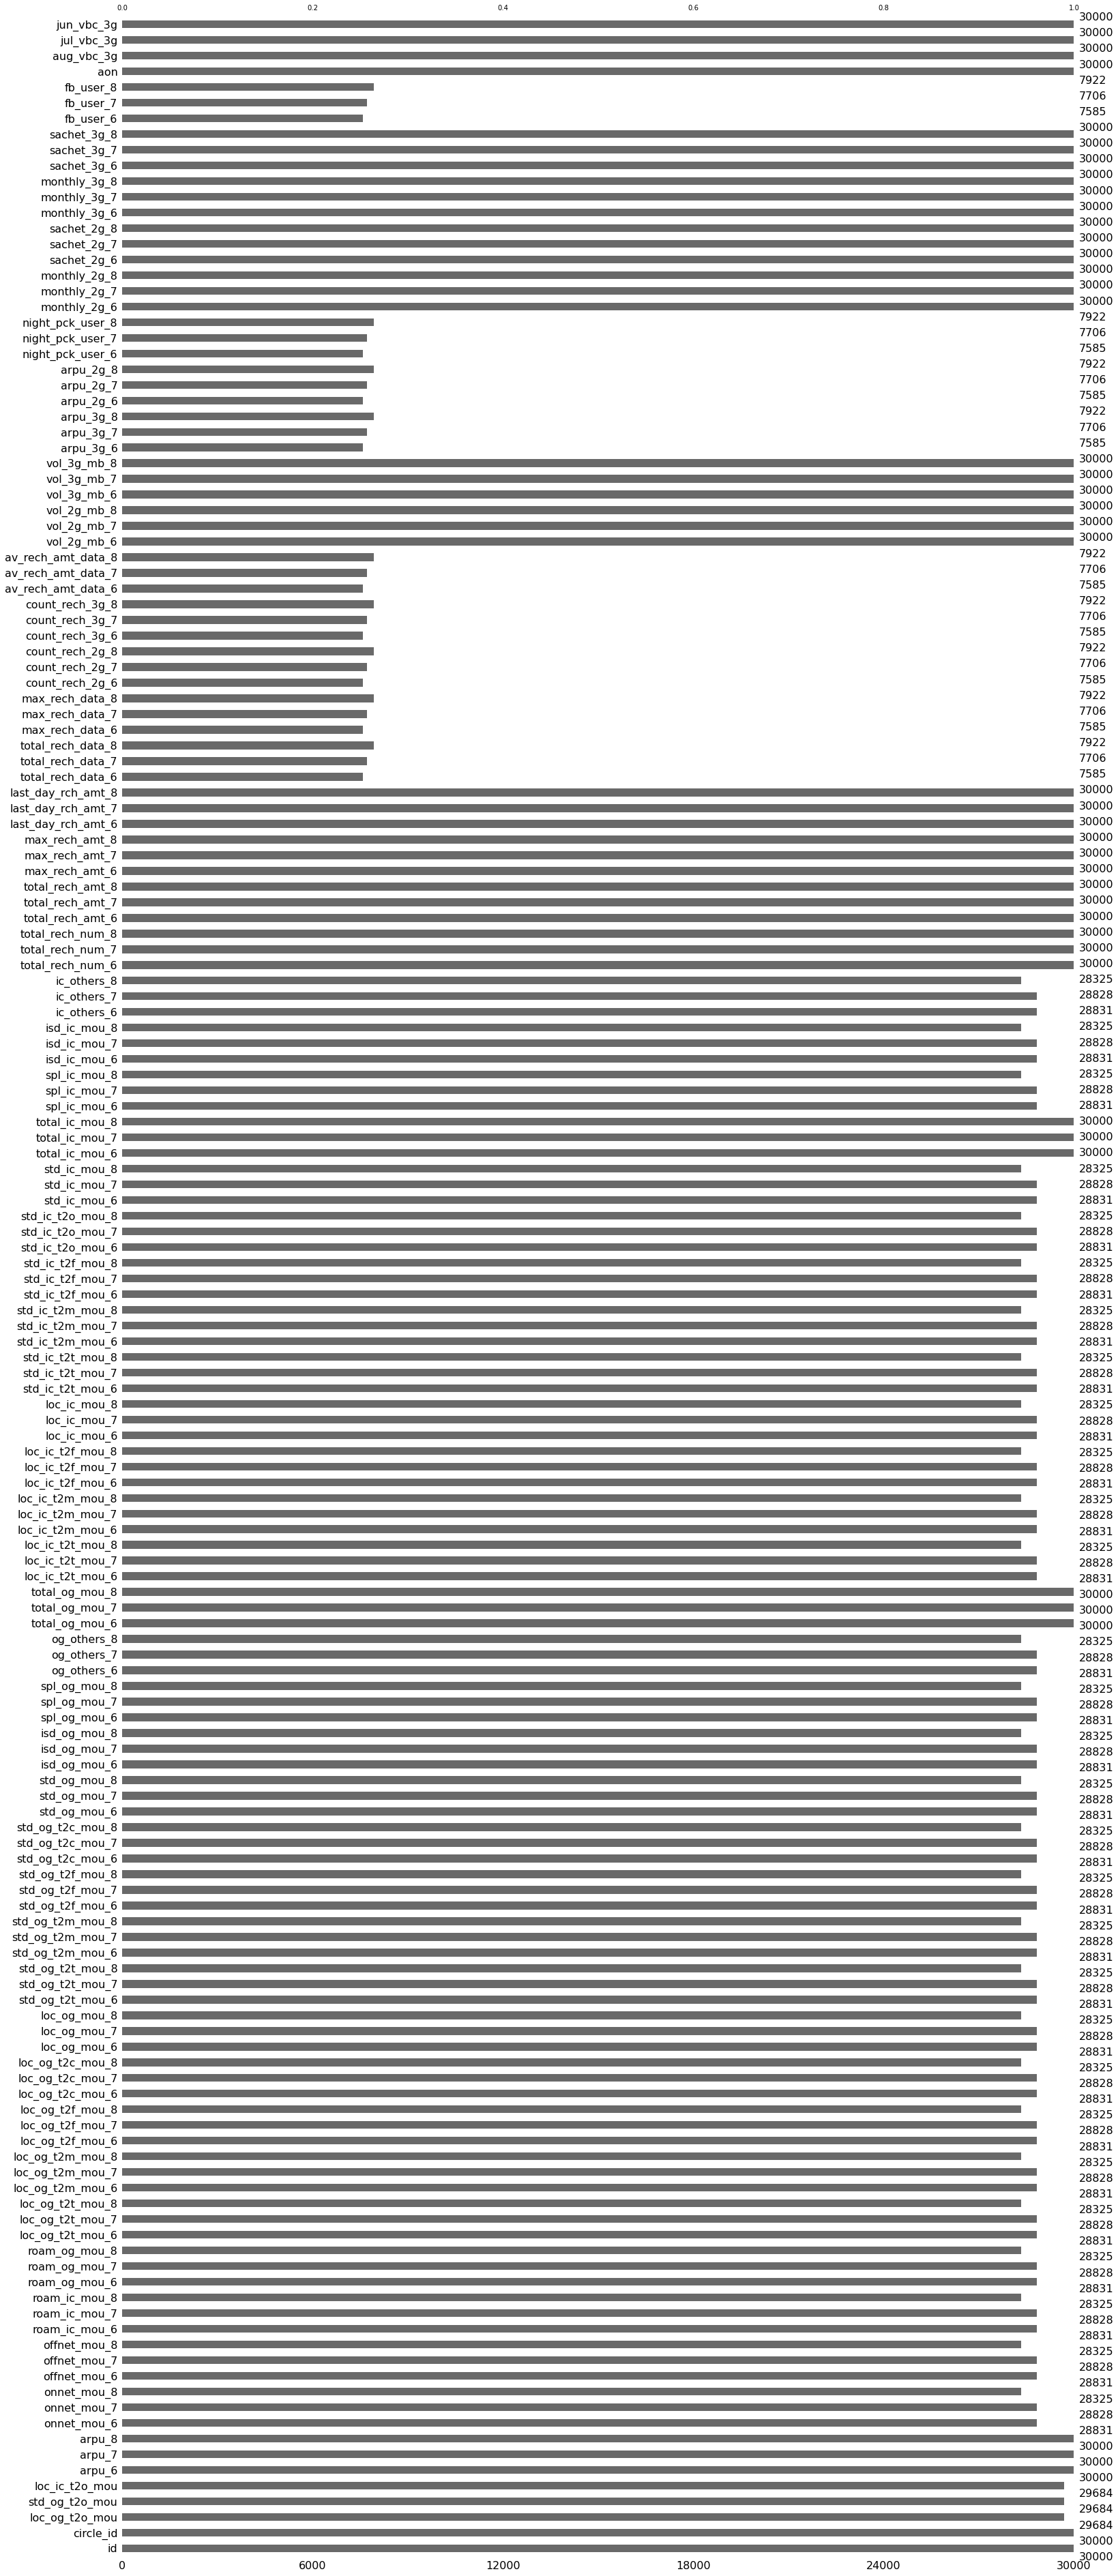

In [205]:
# Checking the missing values...
msno.bar(unseen)

In [206]:
unseen.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou',
           'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
           'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
           'std_ic_t2o_mou_8',],1,inplace=True)

In [207]:
# getting missing %
round(unseen.isnull().mean()*100,2)

id                     0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            3.90
onnet_mou_7            3.91
onnet_mou_8            5.58
offnet_mou_6           3.90
offnet_mou_7           3.91
offnet_mou_8           5.58
roam_ic_mou_6          3.90
roam_ic_mou_7          3.91
roam_ic_mou_8          5.58
roam_og_mou_6          3.90
roam_og_mou_7          3.91
roam_og_mou_8          5.58
loc_og_t2t_mou_6       3.90
loc_og_t2t_mou_7       3.91
loc_og_t2t_mou_8       5.58
loc_og_t2m_mou_6       3.90
loc_og_t2m_mou_7       3.91
loc_og_t2m_mou_8       5.58
loc_og_t2f_mou_6       3.90
loc_og_t2f_mou_7       3.91
loc_og_t2f_mou_8       5.58
loc_og_t2c_mou_6       3.90
loc_og_t2c_mou_7       3.91
loc_og_t2c_mou_8       5.58
loc_og_mou_6           3.90
loc_og_mou_7           3.91
loc_og_mou_8           5.58
std_og_t2t_mou_6       3.90
std_og_t2t_mou_7       3.91
std_og_t2t_mou_8       5.58
std_og_t2m_mou_6       3.90
std_og_t2m_mou_7    

In [208]:
# Getting rid of the columns with missing values over 50%...
unseen = unseen.loc[:,unseen.isnull().mean()<=0.5]

<AxesSubplot:>

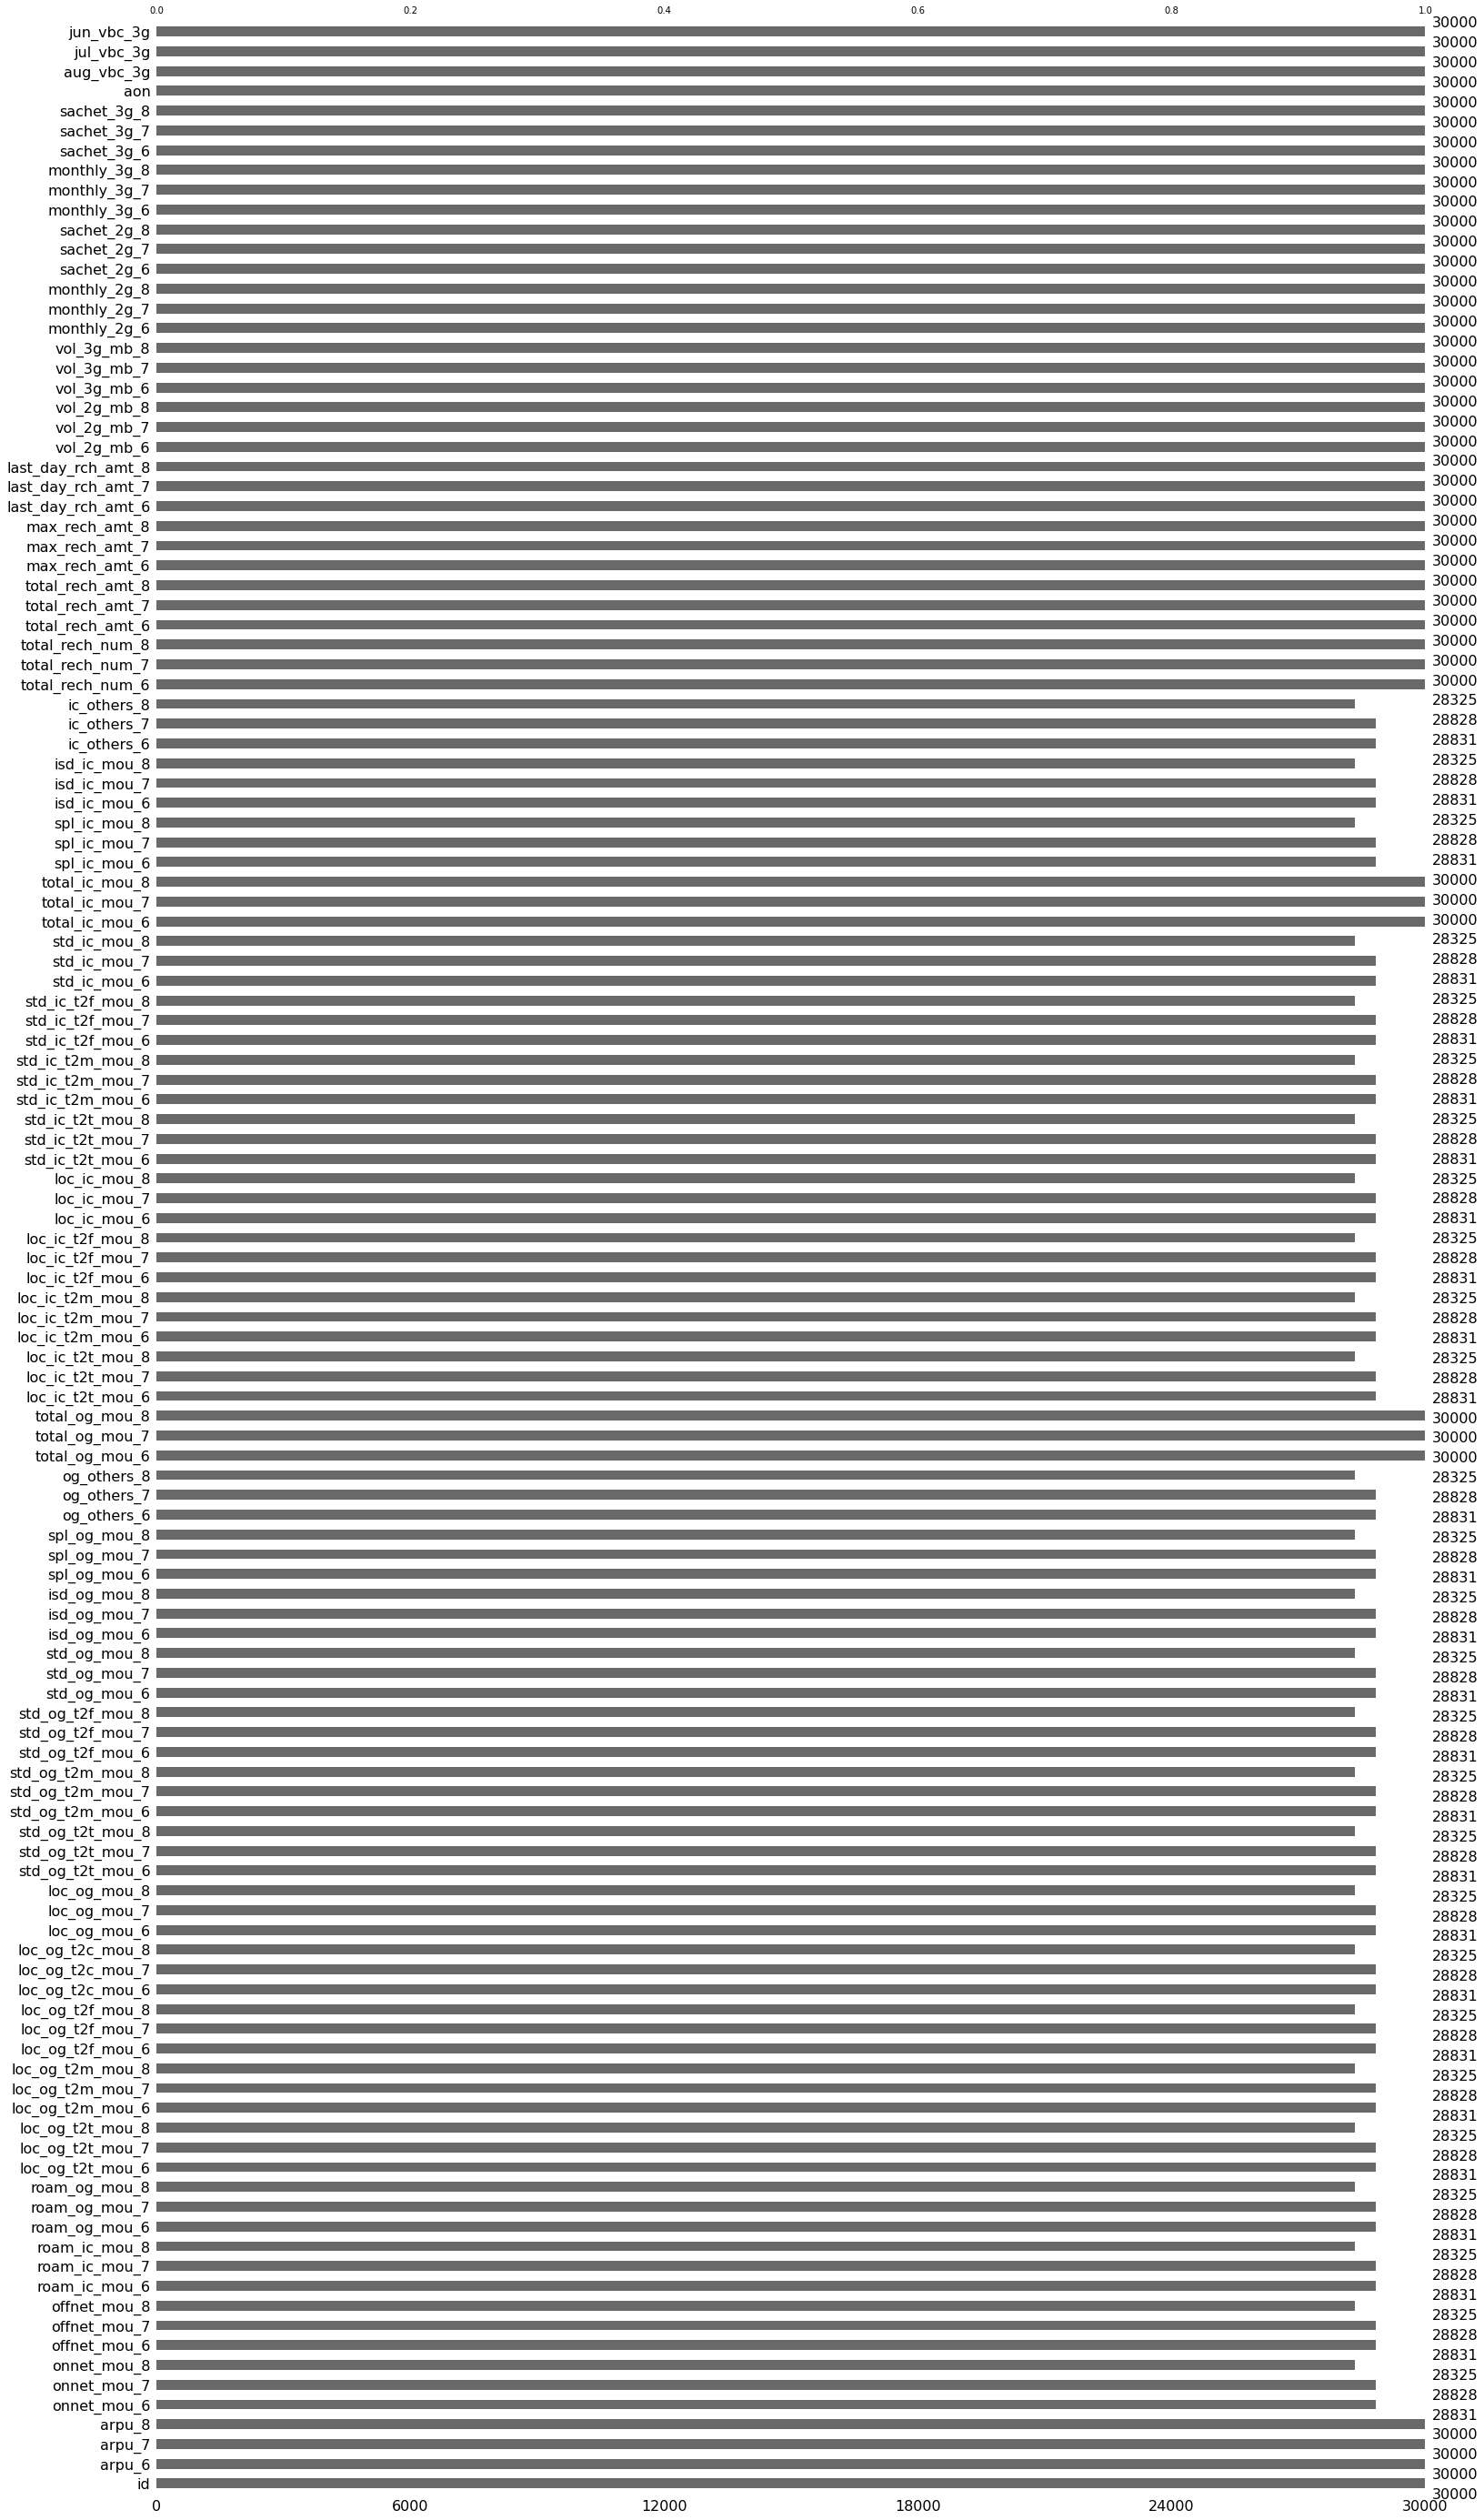

In [209]:
msno.bar(unseen)

In [210]:
# column with missing values
col=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']

In [211]:
# interpolating all the missing value columns
for j in col:
    unseen[j]=unseen[j].interpolate(method='polynomial', order=2)

In [212]:
# Making modified columns
unseen['arpu_Avg']=(unseen['arpu_6']+unseen['arpu_7']+unseen['arpu_8'])/3
unseen['onnet_mou_Avg']=(unseen['onnet_mou_6']+unseen['onnet_mou_7']+unseen['onnet_mou_8'])/3
unseen['offnet_mou_Avg']=(unseen['offnet_mou_6']+unseen['offnet_mou_7']+unseen['offnet_mou_8'])/3
unseen['roam_ic_mou_Avg']=(unseen['roam_ic_mou_6']+unseen['roam_ic_mou_7']+unseen['roam_ic_mou_8'])/3
unseen['roam_og_mou_Avg']=(unseen['roam_og_mou_6']+unseen['roam_og_mou_7']+unseen['roam_og_mou_8'])/3
unseen['loc_og_t2t_mou_Avg']=(unseen['loc_og_t2t_mou_6']+unseen['loc_og_t2t_mou_7']+unseen['loc_og_t2t_mou_8'])/3
unseen['loc_og_t2m_mou_Avg']=(unseen['loc_og_t2m_mou_6']+unseen['loc_og_t2m_mou_7']+unseen['loc_og_t2m_mou_8'])/3
unseen['loc_og_t2f_mou_Avg']=(unseen['loc_og_t2f_mou_6']+unseen['loc_og_t2f_mou_7']+unseen['loc_og_t2f_mou_8'])/3
unseen['loc_og_t2c_mou_Avg']=(unseen['loc_og_t2c_mou_6']+unseen['loc_og_t2c_mou_7']+unseen['loc_og_t2c_mou_8'])/3
unseen['loc_og_mou_Avg']=(unseen['loc_og_mou_6']+unseen['loc_og_mou_7']+unseen['loc_og_mou_8'])/3
unseen['std_og_t2t_mou_Avg']=(unseen['std_og_t2t_mou_6']+unseen['std_og_t2t_mou_7']+unseen['std_og_t2t_mou_8'])/3
unseen['std_og_t2m_mou_Avg']=(unseen['std_og_t2m_mou_6']+unseen['std_og_t2m_mou_7']+unseen['std_og_t2m_mou_8'])/3
unseen['std_og_t2f_mou_Avg']=(unseen['std_og_t2f_mou_6']+unseen['std_og_t2f_mou_7']+unseen['std_og_t2f_mou_8'])/3
unseen['std_og_mou_Avg']=(unseen['std_og_mou_6']+unseen['std_og_mou_7']+unseen['std_og_mou_8'])/3
unseen['isd_og_mou_Avg']=(unseen['isd_og_mou_6']+unseen['isd_og_mou_7']+unseen['isd_og_mou_8'])/3
unseen['spl_og_mou_Avg']=(unseen['spl_og_mou_6']+unseen['spl_og_mou_7']+unseen['spl_og_mou_8'])/3
unseen['og_others_Avg']=(unseen['og_others_6']+unseen['og_others_7']+unseen['og_others_8'])/3
unseen['total_og_mou_Avg']=(unseen['total_og_mou_6']+unseen['total_og_mou_7']+unseen['total_og_mou_8'])/3
unseen['loc_ic_t2t_mou_Avg']=(unseen['loc_ic_t2t_mou_6']+unseen['loc_ic_t2t_mou_7']+unseen['loc_ic_t2t_mou_8'])/3
unseen['loc_ic_t2m_mou_Avg']=(unseen['loc_ic_t2m_mou_6']+unseen['loc_ic_t2m_mou_7']+unseen['loc_ic_t2m_mou_8'])/3
unseen['loc_ic_t2f_mou_Avg']=(unseen['loc_ic_t2f_mou_6']+unseen['loc_ic_t2f_mou_7']+unseen['loc_ic_t2f_mou_8'])/3
unseen['loc_ic_mou_Avg']=(unseen['loc_ic_mou_6']+unseen['loc_ic_mou_7']+unseen['loc_ic_mou_8'])/3
unseen['std_ic_t2t_mou_Avg']=(unseen['std_ic_t2t_mou_6']+unseen['std_ic_t2t_mou_7']+unseen['std_ic_t2t_mou_8'])/3
unseen['std_ic_t2m_mou_Avg']=(unseen['std_ic_t2m_mou_6']+unseen['std_ic_t2m_mou_7']+unseen['std_ic_t2m_mou_8'])/3
unseen['std_ic_t2f_mou_Avg']=(unseen['std_ic_t2f_mou_6']+unseen['std_ic_t2f_mou_7']+unseen['std_ic_t2f_mou_8'])/3
unseen['std_ic_mou_Avg']=(unseen['std_ic_mou_6']+unseen['std_ic_mou_7']+unseen['std_ic_mou_8'])/3
unseen['total_ic_mou_Avg']=(unseen['total_ic_mou_6']+unseen['total_ic_mou_7']+unseen['total_ic_mou_8'])/3
unseen['spl_ic_mou_Avg']=(unseen['spl_ic_mou_6']+unseen['spl_ic_mou_7']+unseen['spl_ic_mou_8'])/3
unseen['isd_ic_mou_Avg']=(unseen['isd_ic_mou_6']+unseen['isd_ic_mou_7']+unseen['isd_ic_mou_8'])/3
unseen['ic_others_Avg']=(unseen['ic_others_6']+unseen['ic_others_7']+unseen['ic_others_8'])/3
unseen['total_rech_num_Avg']=(unseen['total_rech_num_6']+unseen['total_rech_num_7']+unseen['total_rech_num_8'])/3
unseen['total_rech_amt_Avg']=(unseen['total_rech_amt_6']+unseen['total_rech_amt_7']+unseen['total_rech_amt_8'])/3
unseen['max_rech_amt_Avg']=(unseen['max_rech_amt_6']+unseen['max_rech_amt_7']+unseen['max_rech_amt_8'])/3
unseen['last_day_rch_amt_Avg']=(unseen['last_day_rch_amt_6']+unseen['last_day_rch_amt_7']+unseen['last_day_rch_amt_8'])/3
unseen['vol_2g_mb_Avg']=(unseen['vol_2g_mb_6']+unseen['vol_2g_mb_7']+unseen['vol_2g_mb_8'])/3
unseen['vol_3g_mb_Avg']=(unseen['vol_3g_mb_6']+unseen['vol_3g_mb_7']+unseen['vol_3g_mb_8'])/3
unseen['monthly_2g_Avg']=(unseen['monthly_2g_6']+unseen['monthly_2g_7']+unseen['monthly_2g_8'])/3
unseen['sachet_2g_Avg']=(unseen['sachet_2g_6']+unseen['sachet_2g_7']+unseen['sachet_2g_8'])/3
unseen['monthly_3g_Avg']=(unseen['monthly_3g_6']+unseen['monthly_3g_7']+unseen['monthly_3g_8'])/3
unseen['sachet_3g_Avg']=(unseen['sachet_3g_6']+unseen['sachet_3g_7']+unseen['sachet_3g_8'])/3
unseen['Avg_vbc_3g']=(unseen['aug_vbc_3g']+unseen['jul_vbc_3g']+unseen['jun_vbc_3g'])/3

In [213]:
# droping all the old columns
unseen.drop([ 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8',  'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'
       ],1,inplace=True)

In [214]:
unseen.shape

(30000, 43)

#### Handling Outliers

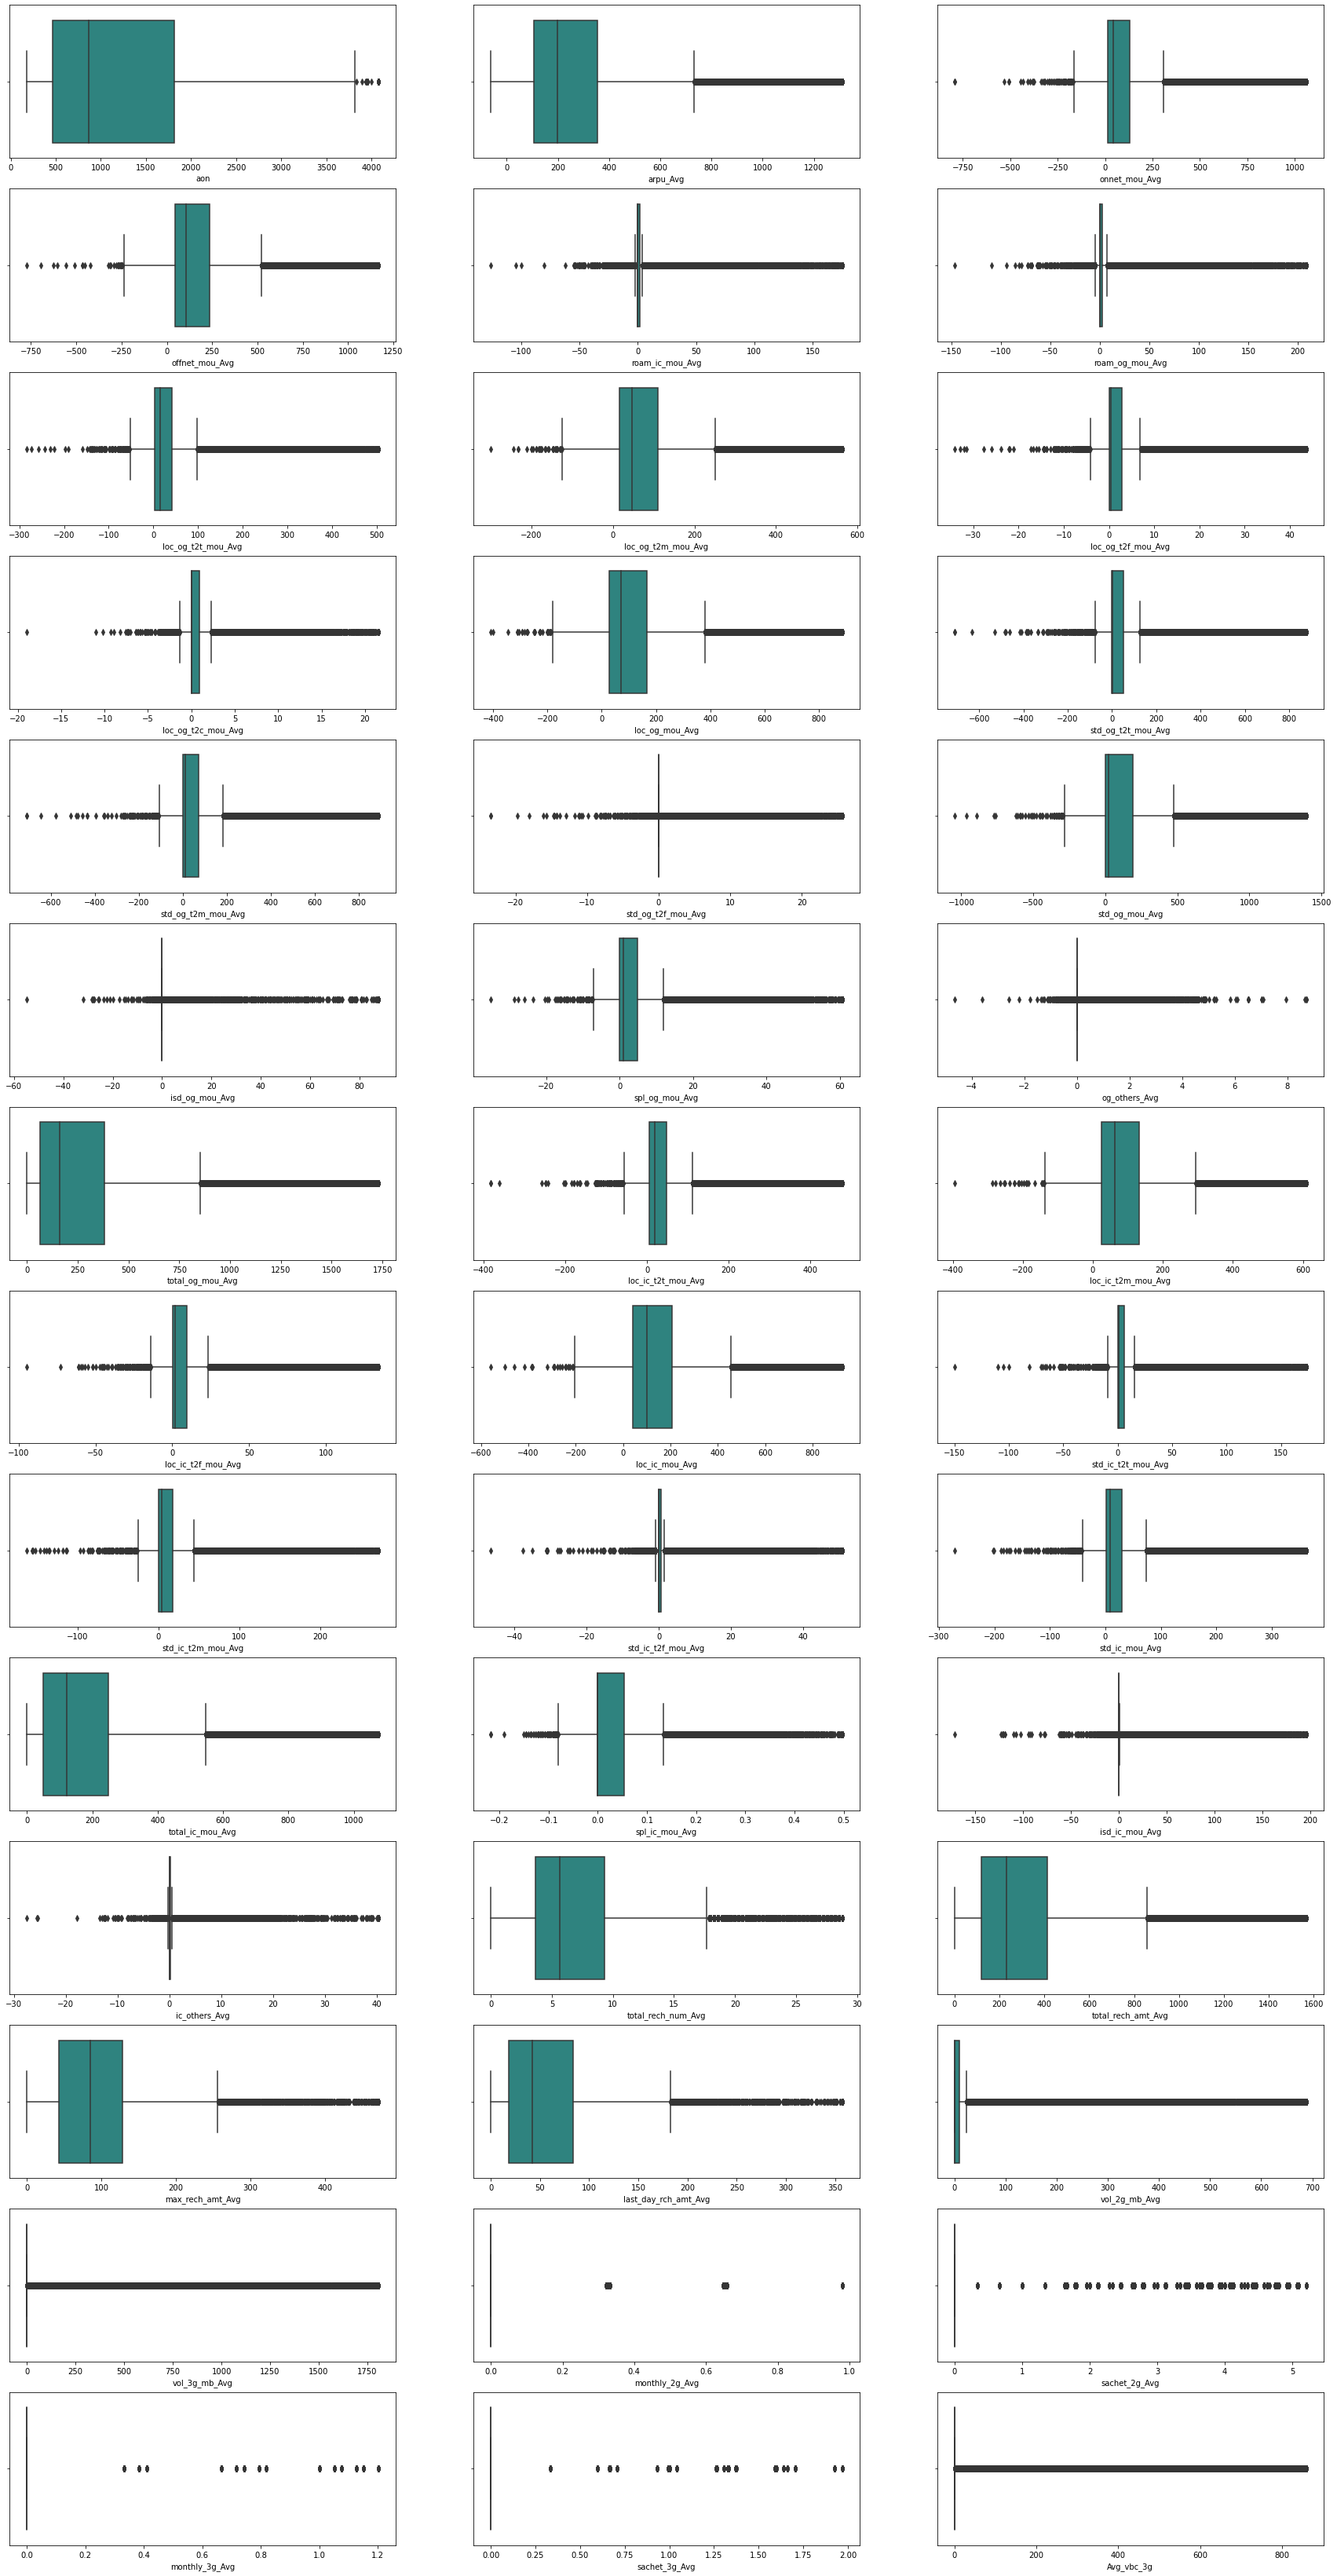

In [215]:
# Making box plot for the data
plt.figure(figsize = (30,180))
feature = unseen.columns[1:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(data[i[1]],palette='viridis')

So from the above plot we can see that outliers are handled and our data looks continuous now

#### Dimentionality reduction using PCA

In [220]:
pca = PCA(random_state=42)

In [221]:
pca.fit(unseen)

PCA(random_state=42)

In [222]:
# cumulative variance calculation
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [226]:
submission_data = unseen[X_train.columns]
submission_data.shape

(30000, 42)

In [227]:
unseen.head()

id   aon    arpu_Avg  onnet_mou_Avg  offnet_mou_Avg  roam_ic_mou_Avg  roam_og_mou_Avg  loc_og_t2t_mou_Avg  loc_og_t2m_mou_Avg  loc_og_t2f_mou_Avg  loc_og_t2c_mou_Avg  loc_og_mou_Avg  std_og_t2t_mou_Avg  std_og_t2m_mou_Avg  std_og_t2f_mou_Avg  std_og_mou_Avg  isd_og_mou_Avg  spl_og_mou_Avg  og_others_Avg  total_og_mou_Avg  loc_ic_t2t_mou_Avg  loc_ic_t2m_mou_Avg  loc_ic_t2f_mou_Avg  loc_ic_mou_Avg  std_ic_t2t_mou_Avg  std_ic_t2m_mou_Avg  std_ic_t2f_mou_Avg  std_ic_mou_Avg  total_ic_mou_Avg  spl_ic_mou_Avg  isd_ic_mou_Avg  ic_others_Avg  total_rech_num_Avg  total_rech_amt_Avg  max_rech_amt_Avg  last_day_rch_amt_Avg  vol_2g_mb_Avg  vol_3g_mb_Avg  monthly_2g_Avg  sachet_2g_Avg  monthly_3g_Avg  sachet_3g_Avg  Avg_vbc_3g
0  69999  1692   73.885667      25.040000       42.383333         0.000000         0.000000           22.056667           12.460000            4.526667                0.01       39.050000            2.983333           25.380000                 0.0       28.363333        0.000000        0.010000       0.000000         67.423333           29.956667            8.110000            0.086667       38.160000            0.000000            1.913333            0.000000        1.913333         40.516667        0.423333        0.000000       0.000000            4.666667           84.333333         36.666667             20.000000            0.0            0.0             0.0            0.0             0.0            0.0        0.00
1  70000  2533  430.201333      45.520000      497.040000         0.000000         0.000000           45.520000          482.983333            0.243333                0.00      528.753333            0.000000           13.813333                 0.0       13.813333        0.266667        0.000000       0.000000        542.836667           16.516667          155.763333            0.496667      172.786667            0.000000            4.170000            0.000000        4.170000        305.876667        0.000000      128.913333       0.000000            4.666667          500.000000        250.000000             83.333333            0.0            0.0             0.0            0.0             0.0            0.0        0.00
2  70001   277  503.655667       7.933333       35.943333        50.756667        44.216667            0.000000            0.000000            0.000000                0.00        0.000000            0.000000            0.000000                 0.0        0.000000        0.000000        0.000000       0.000000          0.000000            0.000000            0.000000            0.000000        0.000000            0.000000            0.000000            0.000000        0.000000          0.000000        0.000000        0.000000       0.000000            6.666667          833.333333        433.333333              0.000000            0.0            0.0             0.0            0.0             0.0            0.0      508.62
3  70002  1244   79.780000       2.490000       89.686667         0.000000         0.000000            1.770000           40.686667            0.783333                2.06       43.243333            0.720000           43.816667                 0.0       44.540000        0.000000        4.393333       0.000000         92.183333           45.263333          481.570000            0.673333      527.520000            1.420000           10.113333            0.000000       11.533333        542.420000        0.000000        3.360000       0.000000            3.333333          123.333333         86.666667             86.666667            0.0            0.0             0.0            0.0             0.0            0.0        0.00
4  70003   462  375.490667     586.880000       52.980000         0.000000         0.000000            5.263333            5.330000            0.000000                0.00       10.596667          581.610000           47.633333                 0.0      629.250000        0.000000        3.686667       0.733333        644.283333            3.423333        

In [228]:
unseen['churn_probability'] = final_model.predict(submission_data)
unseen.reset_index(inplace=True)
output = unseen[['id','churn_probability']]
output.head()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.0s finished


id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [229]:
output.to_csv('tel_churn_nikhil_19Jan22.csv',index=False)